In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn  import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier  
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

### Function:

In [2]:
def data_scale(data):
    scaler = preprocessing.StandardScaler().fit(data)
    scaled = scaler.transform(data)
    return scaled
# noted

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from plotly.graph_objects import Scatter3d
import plotly.graph_objects as go

def plot_data(X,Y, scale= False,plot_2d=False, plot_3d=False, i=1, j=2, k=3):
    # Scale data:
    if scale == True: 
        X_transform = data_scale(X)
    if scale == False:
        X_transform = X.to_numpy()
    # plot
    if plot_2d:
        # 2D scatter plot
        fig = go.Figure(data=[go.Scattergl(
                x = X_transform[:, i],
                y = X_transform[:, j],
                mode='markers',
                marker=dict(size=10,color=Y,colorscale=['red', 'blue'], opacity=1,
                        line=dict(color='black', width=0.2),
                        colorbar=dict(title="Classes")),
                text=Y,
                name='Classes')])
        fig.update_layout(title="2D plot", xaxis_title=f"{X.columns[i]}", 
                          yaxis_title=f"{X.columns[j]}")
        fig.show()
        
    if plot_3d:
        # 3D scatter plot
        fig = go.Figure(data=[go.Scatter3d(
            x=X_transform[:, i],
            y=X_transform[:, j],
            z=X_transform[:, k],
            mode='markers',
            marker=dict(size=5,color=Y,colorscale=['red', 'blue'],opacity=1,
                line=dict(color='black', width=0.2),
                colorbar=dict(title="Classes")),
            text=Y,
            name='Classes')])
        fig.update_layout(title="3D plot" ,scene=dict(
            xaxis_title=f"{X.columns[i]}",
            yaxis_title=f"{X.columns[j]}",
            zaxis_title=f"{X.columns[k]}",
            aspectratio=dict(x=1, y=1, z=1),
            camera=dict(up=dict(x=0, y=0, z=1), eye=dict(x=0, y=1, z=1))))
        fig.show()
###############################

In [4]:
def clf_model(X_train,X_test,y_train,y_test,model =None):
    ### Train the model on the training data: 
    mod = model.fit(X_train, y_train)   
    ### Evaluate the model on the test data: 
    y_pred_test = mod.predict(X_test) 
    y_prob_test = mod.predict_proba(X_test)[:,1]   
    accuracy_test = accuracy_score(y_test,y_pred_test)
    precision_test = precision_score(y_test,y_pred_test,average="macro")
    recall_test = recall_score(y_test,y_pred_test,average="macro")
    f_score_test = f1_score(y_test,y_pred_test,average="macro")
    ###  Evaluate the model on the train data
    y_pred_train = mod.predict(X_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    precision_train = precision_score(y_train,y_pred_train,average="macro")
    recall_train = recall_score(y_train,y_pred_train,average="macro")
    f_score_train = f1_score(y_train,y_pred_train,average="macro")
    ### Data Frame for evaluation:
    df =  pd.DataFrame([{'Accuracy Train' :accuracy_train,
                        'Accuracy Test'   :accuracy_test,
                        'Precision Train' :precision_train,
                        'Precision Test'  :precision_test,
                        'Recall Train'    :recall_train,
                        'Recall Test'     :recall_test,
                        'F1 Score Train'  :f_score_train,
                        'F1 Score Test'   :f_score_test}])
    
    return df,y_train, y_test, y_pred_test, model , y_prob_test
# df -- 0
# y_train -- 1
# y_test -- 2
# y_pred_test -->3
# model -- 4
# y_prob_test --> 5

In [5]:
def plot_confusion_matrix(y_test,y_pred,title='Confusion matrix',f_size=(4, 4)):
    fig, ax = plt.subplots(figsize= f_size)
    cm = confusion_matrix(y_test,y_pred)
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
    labels = ['Class 0', 'Class 1']
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # create text and number: 
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if i == 0 and j == 0:
                text = (f"{'TN='}{format(cm[i, j], '1d')}")
            elif i == 0 and j == 1:
                text = (f"{'FP='}{format(cm[i, j], '2d')}")
            elif i == 1 and j == 0:
                text = (f"{'FN='}{format(cm[i, j], '3d')}")
            elif i == 1 and j == 1:
                text = (f"{'TP='}{format(cm[i, j], '4d')}")
            
            ax.text(j, i, text,
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
            
    fig.tight_layout()
    plt.show()

In [6]:
def report_model(X_train,X_test,y_train,y_test,mod,mod_names):
    # create data fram
    df_res = pd.DataFrame()
    for names, i in zip(mod_names, range(len(mod))):
        df_res.at[i, 'Model'] = names
        result =  clf_model(X_train,X_test,y_train,y_test,model= mod[i])
        res = result[0]
        y_test = result[2]
        y_pred = result[3] 
        # plot confusion_matrix:
        plot_confusion_matrix(y_test,y_pred,title='Confusion matrix'+' '+str(names),
                              f_size=(4, 4))
        # input data in data frame: 
        df_res.at[i,'Accuracy Train']  = res.at[0, 'Accuracy Train']
        df_res.at[i,'Accuracy Test']   = res.at[0, 'Accuracy Test']
        df_res.at[i,'Precision Train'] = res.at[0,'Precision Train']
        df_res.at[i,'Precision Test']  = res.at[0,'Precision Test'] 
        df_res.at[i,'Recall Train']    = res.at[0,'Recall Train']
        df_res.at[i,'Recall Test']     = res.at[0,'Recall Test'] 
        df_res.at[i,'F1 Score Train']  = res.at[0,'F1 Score Train']
        df_res.at[i,'F1 Score Test']   = res.at[0,'F1 Score Test']

        print('\n')
    
    
    ## plot Result:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    # Plot test data
    df_res.plot(x='Model', y=['Accuracy Train','Precision Train','Recall Train','F1 Score Train' ], 
                kind='bar', ax=ax1)
    ax1.set_title('Train Data')
    ax1.set_xlabel('Model')
    ax1.set_ylabel('Performance')
    # Add value labels for test data
    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    rotation=90)
        
        
    # Plot train data
    df_res.plot(x='Model', y=['Accuracy Test','Precision Test','Recall Test','F1 Score Test'] , 
                kind='bar', ax=ax2 )
    ax2.set_title('Test Data')
    ax2.set_xlabel('Model')
    ax2.set_ylabel('Performance')

    # Add value labels for train data
    for p in ax2.patches:
        ax2.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    rotation=90)
    
        
    return df_res   #df_res.sort_values(by=['Recall Test'], ascending = True) 

In [7]:
from matplotlib.colors import ListedColormap
def plot_boundary(DF,X_train,X_test,y_train,y_test,model= None, plot_train=False, 
                  plot_test=False, pca=False,i=1,j=2):
    # df for call coloumns name: 
    # data for plot_boundary
    x1_train, x2_train = X_train[:,i], X_train[:,j]
    x1_test,  x2_test  = X_test[:,i] , X_test[:,j]
    
    x_train = np.c_[x1_train,x2_train]
    x_test = np.c_[x1_test,x2_test]
    # Fit the Decision Tree model to the data
    mod = model.fit(x_train, y_train)
    # Create a mesh grid of points to plot the decision boundary
    x0_min, x0_max = x_test[:, 0].min() - 0.5, x_test[:, 0].max() + 0.5
    x1_min, x1_max = x_test[:, 1].min() - 0.5, x_test[:, 1].max() + 0.5
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, 0.02), np.arange(x1_min, x1_max, 0.02))
    xx = np.c_[x0.ravel(), x1.ravel()]
    # Model to predict the class for each point in the mesh grid
    Z = mod.predict(xx)
    Z = Z.reshape(x0.shape)
    # Plot the decision boundary and data points
    custom_cmap1 = ListedColormap(['c','g'])
    custom_cmap2 = ListedColormap(['r','b'])
    plt.contourf(x0,x1,Z, alpha=.5, cmap=custom_cmap1)

    if pca== True:
        if plot_train:
            scatter = plt.scatter(x_train[:, 0],x_train[:, 1],
                                  c=y_train,cmap=custom_cmap2,alpha=1.0,edgecolor='k')
        elif plot_test:
            scatter= plt.scatter(x_test[:, 0], x_test[:, 1], 
                                 c=y_test, cmap=custom_cmap2,alpha=1.0,edgecolor='k') 
        
        #plt.title(f'2D Decision Boundary (PCA Components {i} and {j})')
        plt.legend(*scatter.legend_elements(), title="Classes")
        plt.xlabel(f"Component {i}")
        plt.ylabel(f"Component {j}")
    if pca==False:
        if plot_train:
            scatter=plt.scatter(x_train[:, 0],x_train[:, 1],c=y_train,
                                cmap=custom_cmap2,alpha=1.0,edgecolor='k')
        elif plot_test:
            scatter=plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, 
                                cmap=custom_cmap2,alpha=1.0,edgecolor='k')
        #plt.legend(*scatter.legend_elements(), title="Classes")
        plt.legend(*scatter.legend_elements(), title="Classes")
        plt.xlabel(f"{DF.columns[i]}")
        plt.ylabel(f"{DF.columns[j]}")
        #plt.title('2D Decision Boundary')
    
#################################

In [8]:
def cross_validation(dt_X,Y,k, model =None,resample=None,method=None,plot=False): 
    #Score:    
    accuracy_test   = np.zeros(k)
    accuracy_train  = np.zeros(k)
    precision_test  = np.zeros(k)
    precision_train = np.zeros(k)
    f1_score_test   = np.zeros(k)
    f1_score_train  = np.zeros(k)
    recall_test     = np.zeros(k)
    recall_train    = np.zeros(k) 
    df =  pd.DataFrame()  
    ## fold size:
    fold_size = int(len(dt_X)/k)
    ## k-fold cross validation:
    for i in range(k):
        start_idx = i*fold_size
        end_idx   = (i+1)*fold_size
        ## Split fold:
        X_train_0 = np.concatenate([dt_X[:start_idx], dt_X[end_idx:]], axis=0)
        y_train_0 = np.concatenate([Y[:start_idx], Y[end_idx:]], axis=0)
        if resample == 'Over':
            X_res_over,y_res_over = OverSampling_transform(X_train_0, y_train_0 , method)
            X_train , y_train = X_res_over, y_res_over
        elif resample == 'Under':
            X_res_under, y_res_under = UnderSampling_transform(X_train_0, y_train_0, method)
            X_train, y_train = X_res_under, y_res_under
        else:
            X_train, y_train = X_train_0, y_train_0
            
        X_test  = dt_X[start_idx:end_idx]
        y_test  = Y[start_idx:end_idx]
        ## Train the model on the training data 
        mod = model.fit(X_train, y_train)
        
        ## Evaluate the model on the test data 
        y_pred_train = mod.predict(X_train) 
        
        #y_prob = mod.predict_proba(X_test) 
        accuracy_train[i]   = accuracy_score(y_train,y_pred_train)
        precision_train[i]  = precision_score(y_train,y_pred_train,average="macro")
        recall_train[i]     = recall_score(y_train,y_pred_train,average="macro")
        f1_score_train[i]   = f1_score(y_train,y_pred_train,average="macro")
        
        ## Evaluate the model on the train data 
        y_pred_test  = mod.predict(X_test)
        accuracy_test[i]  = accuracy_score(y_test,y_pred_test)
        precision_test[i] = precision_score(y_test,y_pred_test,average="macro")
        recall_test[i]    = recall_score(y_test,y_pred_test,average="macro")
        f1_score_test[i]   = f1_score(y_test,y_pred_test,average="macro")
          
        df.at[i, 'Kfold']          = i+1
        df.at[i,'Accuracy Test']   = accuracy_test[i]
        df.at[i,'Accuracy Train']  = accuracy_train[i]
        df.at[i,'Precision Test']  = precision_test[i]
        df.at[i,'Precision Train'] = precision_train[i]
        df.at[i,'Recall Test']     = recall_test[i]
        df.at[i,'Recall Train']    = recall_train[i]
        df.at[i,'F1 Score Test']   = f1_score_test[i]
        df.at[i,'F1 Score Train']  = f1_score_train[i] 
    
    ## Result:
    Result = pd.DataFrame()
    Result.at[0,'Accuracy Test']  = np.mean(accuracy_test)
    Result.at[0,'Accuracy Train']   = np.mean(accuracy_train)
    Result.at[0,'Precision Test'] = np.mean(precision_test)
    Result.at[0,'Precision Train']  = np.mean(precision_train)
    Result.at[0,'Recall Test']    = np.mean(recall_test)
    Result.at[0,'Recall Train']     = np.mean(recall_train)
    Result.at[0,'F1 Score Test']  = np.mean(f1_score_test)
    Result.at[0,'F1 Score Train']   = np.mean(f1_score_train)
    if plot == True:
        fig = go.Figure()
        fig.add_trace(go.Box(y=accuracy_test,  name = 'Accuracy Test'))
        fig.add_trace(go.Box(y=accuracy_train,   name = 'Accuracy Train'))
        fig.add_trace(go.Box(y=precision_test, name = 'Precision Test'))
        fig.add_trace(go.Box(y=precision_train,  name = 'Precision Train'))
        fig.add_trace(go.Box(y=recall_test,    name = 'Recall Test'))
        fig.add_trace(go.Box(y=recall_train,     name = 'Recall Train'))
        fig.add_trace(go.Box(y=f1_score_test,   name = 'F1 score Test'))
        fig.add_trace(go.Box(y=f1_score_train,    name = 'F1 score Train')) 
        fig.update_layout(title=f"Cross Validation with {k} fold")
        fig.show()
    
        
    return df , Result

### Loading Data

In [9]:
df = pd.read_excel("Credit_Scoring.xlsx", sheet_name='Original_data')
print(df.shape)
#print(df.columns)
df.head(3) 

(54433, 44)


,reference,advance,temployer,ratio,Pyament_term,start,employment,marital_status,debt,locaSit,...,csta,overdue,default,default_c,score_odds,score_coef,p1,p0,score1,score0
0,GLF-MKR-01-00061414,0.1,3.0,19.52,1,2017,Self-Employed,Married,Yes,Owner,...,Activated,0,0,0,24.0300,-2.32176,0.089337,0.910663,4.94691,32.7839
1,GLF-BTB-13-00053845,0.1,5.0,16.19,3,2016,Self-Employed,Married,No,Owner,...,Activated,0,0,0,26.4201,-2.05440,0.113608,0.886392,7.63183,31.9101
2,GLF-STR-01-00039940,0.7,2.0,13.63,3,2016,Self-Employed,Married,Yes,Owner,...,Activated,0,0,0,28.0363,-2.68875,0.063641,0.936359,5.88419,33.7089


### 1. Data cleaning

In [10]:
df_copy = df.copy()
#df_copy.head(5)  
#df_copy.isnull().sum() 

### 1.1 Filling Missing Values by mean Values

#### Filling feature "temployer": 

           temployer
templ_g1            
1.01/2.00   1.831413
2.01/4.00   3.293537
4.01/6.00   5.268368
6.01/max   12.682616
min/1.00    0.688712


<Axes: xlabel='templ_g1', ylabel='temployer'>

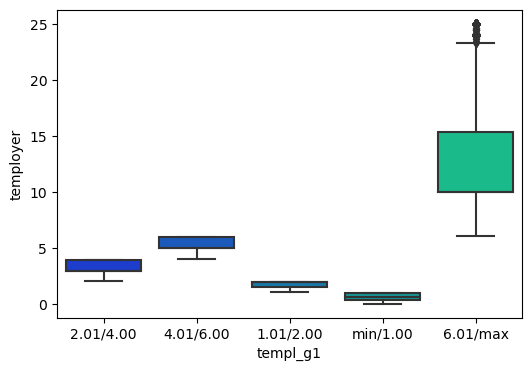

In [11]:
df_employer = df_copy[["temployer", "templ_g1"]]
print(df_employer.groupby('templ_g1').mean()) 
plt.figure(figsize=(6, 4)) 
sns.boxplot(x='templ_g1',y='temployer',data=df_copy,palette='winter')  

In [12]:
def impute_temployer(cols):
    temployer = cols[0]
    templ_g1 = cols[1]
    if pd.isnull(temployer):
        if templ_g1 == "1.01/2.00":
            return 1.831413
        elif templ_g1 =="2.01/4.00":
            return 3.293537
        elif templ_g1 =="4.01/6.00":   
            return 5.268368
        elif templ_g1 =="6.01/max": 
            return 12.682616
        else: 
            return 0.688712
    else:
        return temployer

In [13]:
df_copy["temployer"] = df_copy[['temployer','templ_g1']].apply(impute_temployer,axis=1)

####  Filling feature "taddress": 

              taddress
taddress_g1           
1.01/2.00     1.854555
2.01/5.00     3.890823
5.01/7.00     6.428668
7.01/max     20.770559
min/1         0.721405


<Axes: xlabel='taddress_g1', ylabel='taddress'>

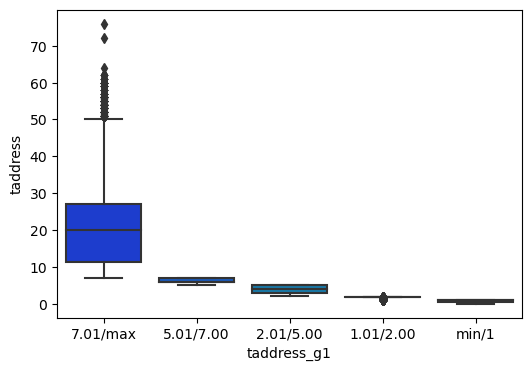

In [14]:
df_taddress = df_copy[["taddress", "taddress_g1"]]
print(df_taddress.groupby('taddress_g1').mean())  
plt.figure(figsize=(6, 4)) 
sns.boxplot(x='taddress_g1', y='taddress',data=df_copy,palette='winter')  

In [15]:
def impute_taddress(cols):
    taddress = cols[0]
    taddress_g1 = cols[1]
    if pd.isnull(taddress):
        if taddress_g1 == "1.01/2.00":
            return 1.854555
        elif taddress_g1 =="2.01/5.00":
            return 3.890823
        elif taddress_g1 =="5.01/7.00":   
            return 6.428668
        elif taddress_g1 =="7.01/max ": 
            return 20.770559
        else: 
            return 0.721405
    else:
        return taddress

In [16]:
df_copy["taddress"] = df_copy[['taddress','taddress_g1']].apply(impute_taddress,axis=1)

#### Filling feature "children": 

<Axes: xlabel='marital_status', ylabel='children'>

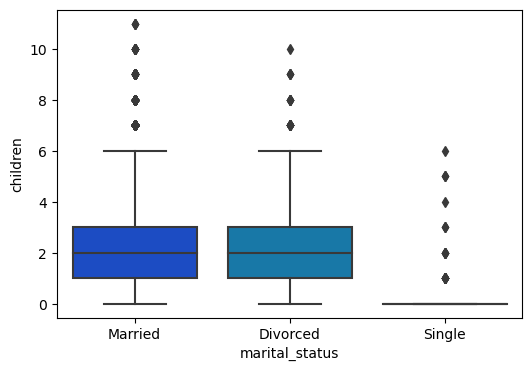

In [17]:
plt.figure(figsize=(6, 4)) 
sns.boxplot(x='marital_status',y='children',data=df_copy,palette='winter')   

In [18]:
def impute_children(cols):
    children = cols[0]
    maritalstatus = cols[1]
    if pd.isnull(children):
        if maritalstatus == "Single":
            return 0
        elif maritalstatus =="Divorced":
            return 2
        else:
            return 2
    else:
        return children
df_copy["children"] = df_copy[['children','marital_status']].apply(impute_children,axis=1)

In [19]:
df_copy["children"] = df_copy[['children','marital_status']].apply(impute_children,axis=1)

### 1.2 Drop out feature: 

In [20]:
print((df["sex"] == df["sex01"]).sum())
print(len(df))
if (df["sex"] == df["sex01"]).sum() == len(df):
    print("Can drop df[sex01]")
else:
    print("Check it")
    

54433
54433
Can drop df[sex01]


In [21]:
print((df["Pyament_term"] == df["term_st"]).sum())
print(len(df))
if (df["Pyament_term"] == df["term_st"]).sum() == len(df):
    print("Can drop df[term_st] ")
else:
    print("Check it")

54433
54433
Can drop df[term_st] 


In [22]:
print(df["cstatus"].unique())
## sum(): it sum of all the true between 2 columns
if (df["cstatus"] == df["csta"]).sum() == len(df):
    print("Can drop df[csta] ")
else:
    print("Check it")

['Activated' 'Paid Off' 'Repossessed' 'Terminated']
Can drop df[csta] 


### 1.3 Data for project credit scoring model

In [23]:
df_copy.drop(["ratio", "em1", "em0","certificate","age_group","sex01","ratio_group",
              "term_st","term_group","taddress_g1", "templ_g1", "y2013", "y2014", "y2015",
              "y2016", "y2017" ,"child125643","child9_g1",
              "child1t6", "advance1t5", "csta", "default_c","score_odds","score_coef",
             "p1","p0","score1","score0"],axis=1, inplace=True)
print(df_copy.shape)
df_copy.head(5)

(54433, 16)


,reference,advance,temployer,Pyament_term,start,employment,marital_status,debt,locaSit,age,sex,taddress,children,cstatus,overdue,default
0,GLF-MKR-01-00061414,0.1,3.00,1,2017,Self-Employed,Married,Yes,Owner,31,F,32.0,3.0,Activated,0,0
1,GLF-BTB-13-00053845,0.1,5.00,3,2016,Self-Employed,Married,No,Owner,38,M,10.0,3.0,Activated,0,0
2,GLF-STR-01-00039940,0.7,2.00,3,2016,Self-Employed,Married,Yes,Owner,26,F,6.0,2.0,Activated,0,0
3,GLF-KTH-01-00006751,0.2,4.00,3,2014,Self-Employed,Married,Yes,Owner,53,M,51.0,5.0,Activated,0,0
4,GLF-BTB-01-00040207,0.1,0.42,5,2016,Self-Employed,Married,No,Owner,34,F,20.0,2.0,Activated,14,0


In [24]:
'''
df = pd.read_excel("Credit_Scoring.xlsx", sheet_name='Credit_Scoring')
print(df.shape)
#print(df.columns)
df.head(3) 

df.isnull().sum() 
df.describe()


df_copy = df.copy()
#df_copy.head(5)  
df_copy.isnull().sum() 
df_copy["temployer"].fillna(df_copy["temployer"].mean().round(1),inplace=True)
df_copy["taddress"].fillna(df_copy["taddress"].mean().round(1),inplace=True)

'''

'\ndf = pd.read_excel("Credit_Scoring.xlsx", sheet_name=\'Credit_Scoring\')\nprint(df.shape)\n#print(df.columns)\ndf.head(3) \n\ndf.isnull().sum() \ndf.describe()\n\n\ndf_copy = df.copy()\n#df_copy.head(5)  \ndf_copy.isnull().sum() \ndf_copy["temployer"].fillna(df_copy["temployer"].mean().round(1),inplace=True)\ndf_copy["taddress"].fillna(df_copy["taddress"].mean().round(1),inplace=True)\n\n'

### 1.4 Prepare data for Modeling after cleaning

In [25]:
df_copy.drop(["reference","overdue","start"],axis=1, inplace=True)
print(df_copy.shape)
df_copy.head(5)

(54433, 13)


,advance,temployer,Pyament_term,employment,marital_status,debt,locaSit,age,sex,taddress,children,cstatus,default
0,0.1,3.00,1,Self-Employed,Married,Yes,Owner,31,F,32.0,3.0,Activated,0
1,0.1,5.00,3,Self-Employed,Married,No,Owner,38,M,10.0,3.0,Activated,0
2,0.7,2.00,3,Self-Employed,Married,Yes,Owner,26,F,6.0,2.0,Activated,0
3,0.2,4.00,3,Self-Employed,Married,Yes,Owner,53,M,51.0,5.0,Activated,0
4,0.1,0.42,5,Self-Employed,Married,No,Owner,34,F,20.0,2.0,Activated,0


####  Distributions of various variables of class

0    51393
1     3040
Name: default, dtype: int64


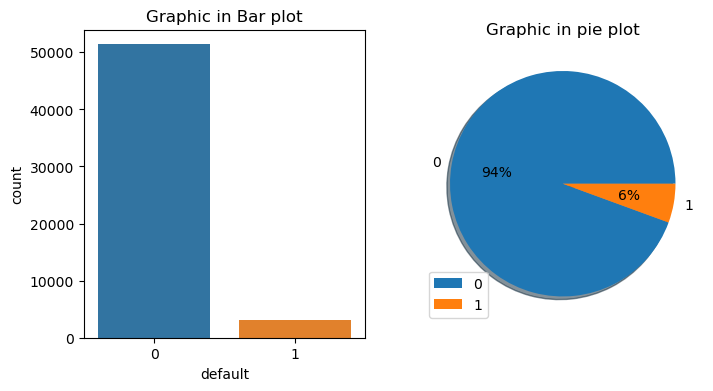

In [26]:
print(df["default"].value_counts())
figure = plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
ax.set_title('Graphic in Bar plot')
#sns.set_theme(palette='deep')
sns.countplot(x='default',data=df) 
ax = plt.subplot(1,2,2)
ax.set_title('Graphic in pie plot')
plt.pie(df["default"].value_counts(),
        labels=df["default"].value_counts().index,shadow=True,autopct='%.0f%%')
plt.legend(loc=3)
plt.show()

### 1.5 Data Visualization

In [27]:
'''
df_feacture = pd.concat([X, Y], axis = 1)
sns.pairplot(df_features0, hue ='default') 
plt.show()
'''

"\ndf_feacture = pd.concat([X, Y], axis = 1)\nsns.pairplot(df_features0, hue ='default') \nplt.show()\n"

<Figure size 1200x600 with 0 Axes>

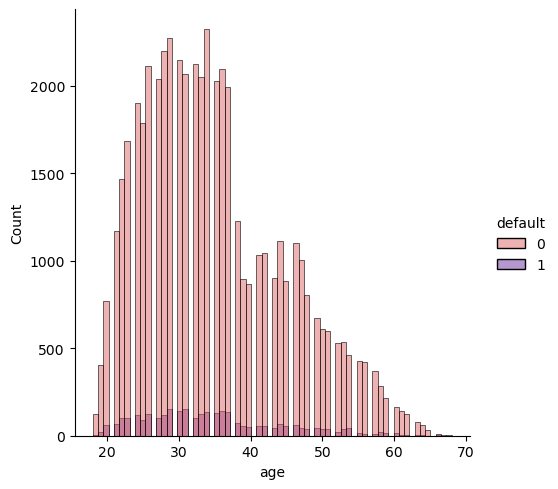

<Figure size 1200x600 with 0 Axes>

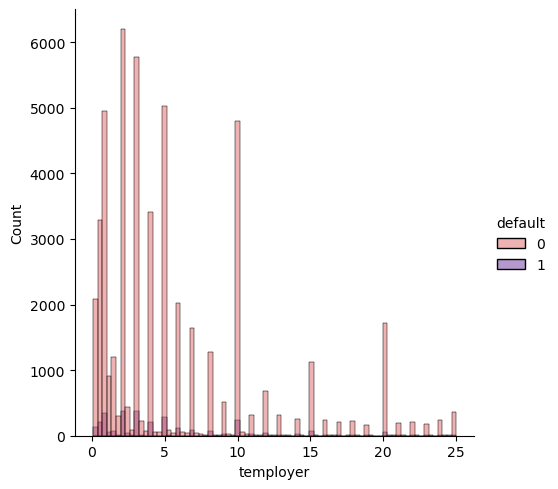

<Figure size 1200x600 with 0 Axes>

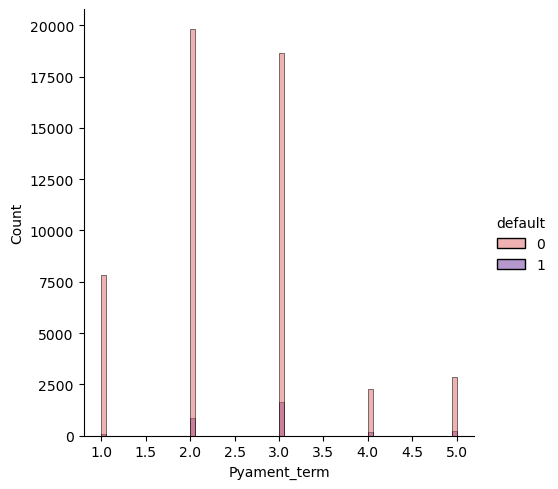

<Figure size 1200x600 with 0 Axes>

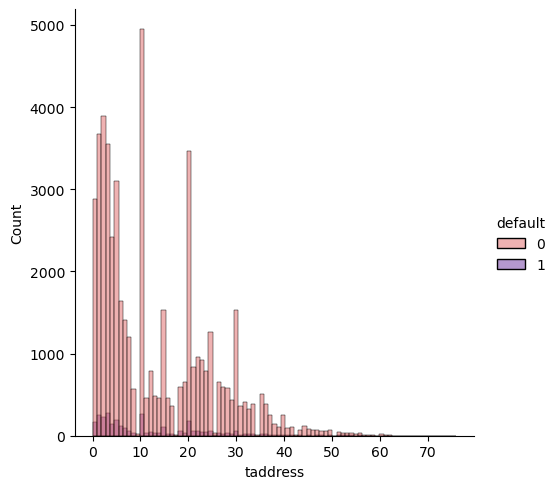

<Figure size 1200x600 with 0 Axes>

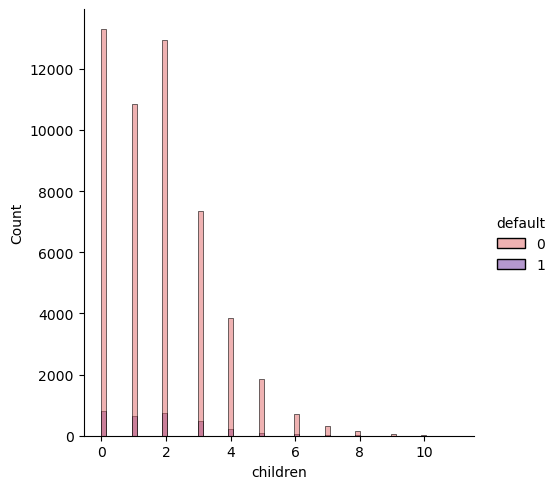

<Figure size 1200x600 with 0 Axes>

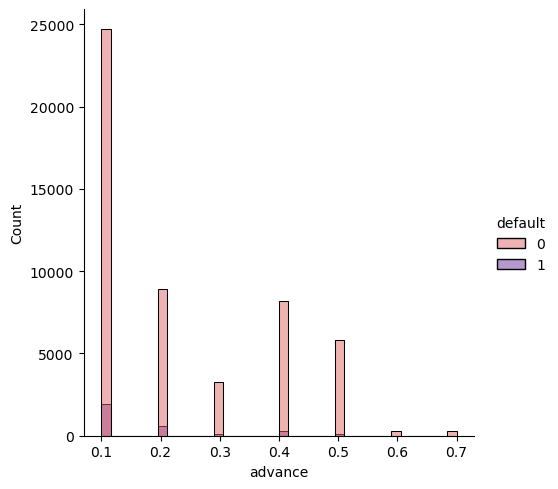

<Figure size 1200x600 with 0 Axes>

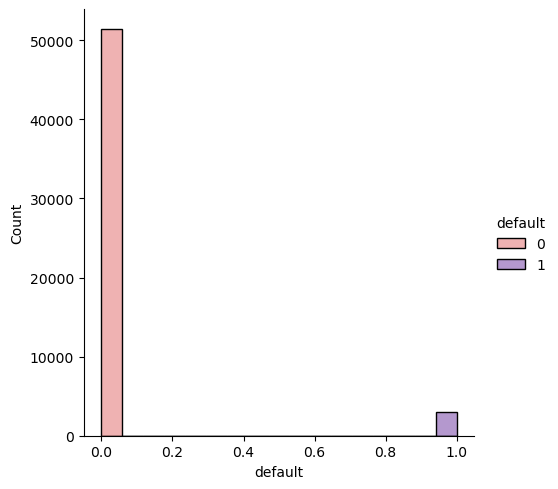

In [28]:

basic_feature0 = ["age", "temployer","Pyament_term","taddress","children","advance","default"]
for i in basic_feature0:
    plt.figure(figsize=(12, 6))
    sns.displot(x=i, data=df_copy, hue=df_copy["default"], palette=["#e06666", "#6a329f"])
    plt.show()


In [29]:
'''
basic_feature0 = ["age", "temployer","Pyament_term","taddress","children","advance","default"]
for i in basic_feature0:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(y=df_copy[i], x=df_copy['age'] , hue=df_copy["default"], palette=["#ff006e", "#83c5be"])
    plt.show()
'''

'\nbasic_feature0 = ["age", "temployer","Pyament_term","taddress","children","advance","default"]\nfor i in basic_feature0:\n    plt.figure(figsize=(12, 6))\n    sns.scatterplot(y=df_copy[i], x=df_copy[\'age\'] , hue=df_copy["default"], palette=["#ff006e", "#83c5be"])\n    plt.show()\n'

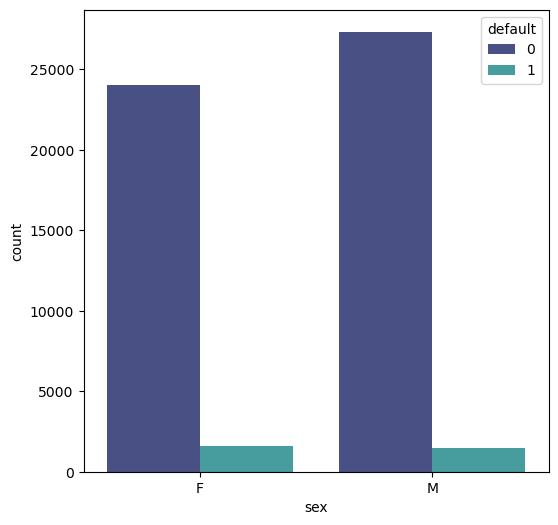

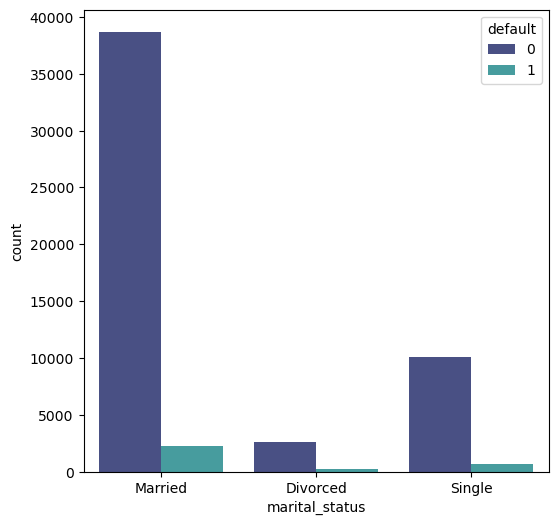

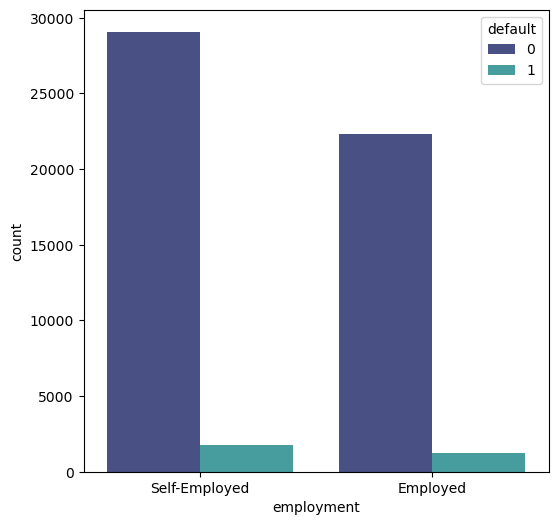

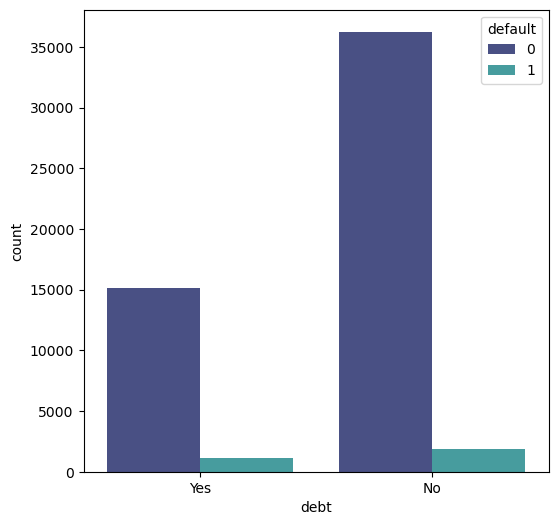

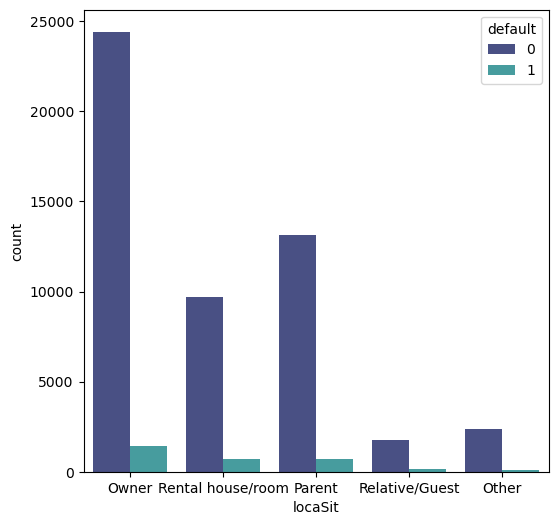

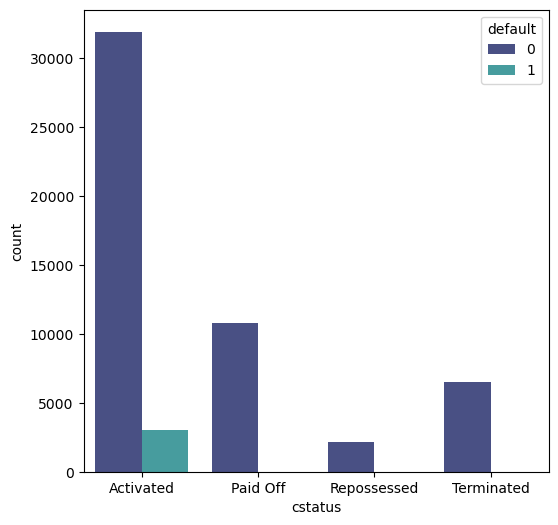

In [30]:

feature_obj = ["sex","marital_status","employment", "debt","locaSit", "cstatus"]
for i in feature_obj:
    plt.figure(figsize=(6,6))
    sns.countplot(x=i, data=df_copy,palette="mako", hue=df_copy["default"])
    plt.show()


## 2. Basic Model on numerical features after cleaning

### 2.1 Check the correlation of each feactures

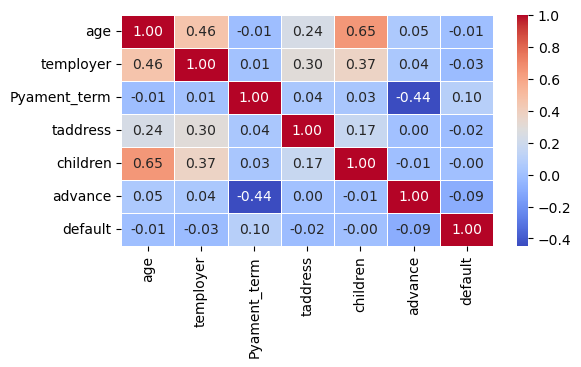

In [31]:
basic_feature0 = ["age", "temployer","Pyament_term","taddress","children","advance","default"]
df_features0   =  df_copy[basic_feature0]
## Visualization of the correlation matrix
corr_matrix = df_features0.corr(method='pearson')
f, ax = plt.subplots(figsize=(6,3))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4, annot_kws={"size": 10}, 
            cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
#df_copy.corr() 

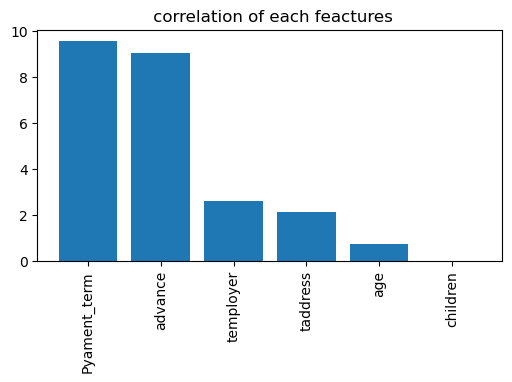

In [32]:

df_corr = pd.DataFrame(abs(df_features0.corr()['default'].drop('default')*100).sort_values(ascending=False))
figure = plt.figure(figsize=(6,3))
plt.title(' correlation of each feactures')
plt.bar(df_corr.index,df_corr['default'])
plt.xticks(rotation=90)
plt.show()


### 2.2  Feature for modeling

####  Data for modeling

In [33]:
basic_feature0 = ["age", "temployer","Pyament_term","taddress","children","advance","default"]
basic_feature1 = ["age", "temployer","Pyament_term","taddress","children","advance"]
X = df_copy[basic_feature1]
X_scaled = data_scale(X) 
Y = df_copy["default"]
y = Y.to_numpy()
## Split data: 
X_train_0,X_test_0,y_train_0,y_test_0 = train_test_split(X_scaled, y,test_size=0.3,
                                                         random_state=1,shuffle=True)

In [34]:
#plot_data(X, y, scale= True ,plot_3d=True, i=0, j=1, k=2)

In [37]:
import pandas as pd
import numpy as np
from sklearn . impute import SimpleImputer
from sklearn . preprocessing import OrdinalEncoder
from sklearn . compose import ColumnTransformer
from sklearn . feature_selection import SequentialFeatureSelector
from sklearn . model_selection import cross_val_score
from sklearn . neighbors import KNeighborsClassifier
from sklearn . linear_model import LogisticRegression
from sklearn . svm import SVC
from sklearn . tree import DecisionTreeClassifier
from sklearn . ensemble import RandomForestClassifier , GradientBoostingClassifier
#from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier

#### Classifiation model:  

c:\users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


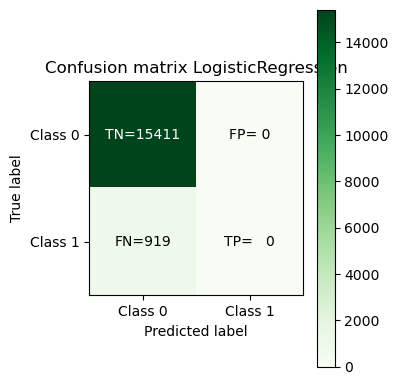

c:\users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


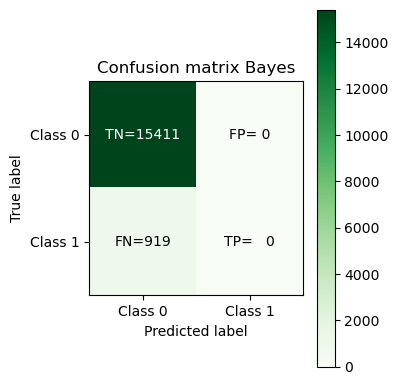

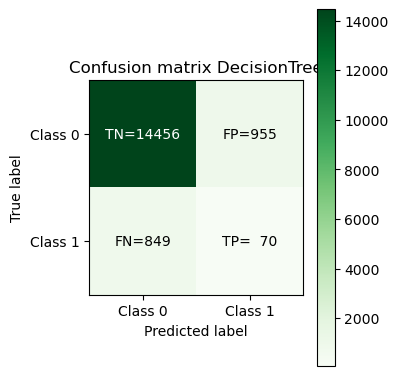

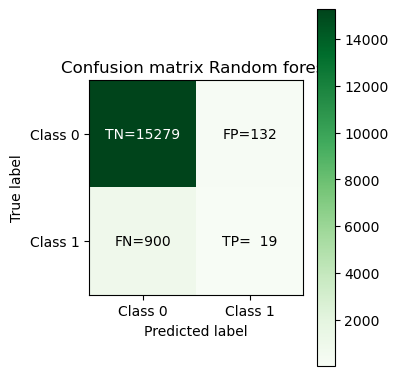

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


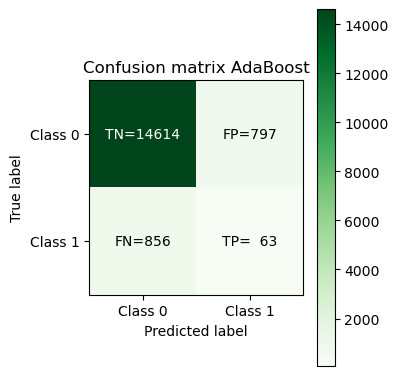

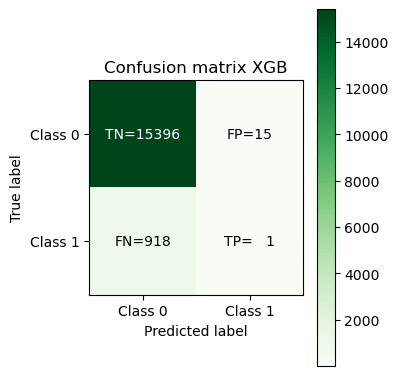

,Model,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1 Score Train,F1 Score Test
0,LogisticRegression,0.944335,0.943723,0.472168,0.471862,0.500000,0.500000,0.485685,0.485523
1,Bayes,0.944335,0.943723,0.472168,0.471862,0.500000,0.500000,0.485685,0.485523
2,DecisionTree,0.989371,0.889528,0.993328,0.506410,0.905414,0.507101,0.944536,0.506642
3,Random forest,0.989240,0.936803,0.987343,0.535100,0.909115,0.506055,0.944385,0.501423
4,AdaBoost,0.989371,0.898775,0.993328,0.508961,0.905414,0.508418,0.944536,0.508649
5,XGB,0.946093,0.942866,0.972999,0.503115,0.515794,0.500057,0.516747,0.486365


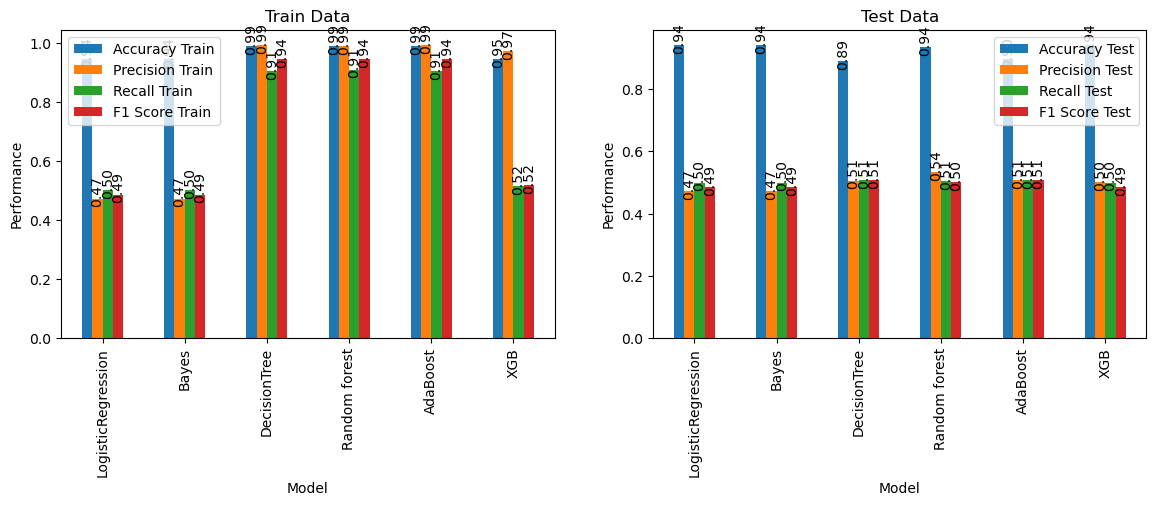

In [39]:
mod =[LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=100, random_state=0),
    XGBClassifier(n_estimators= 100)
     ]

mod_names=['LogisticRegression','Bayes','DecisionTree','Random forest','AdaBoost','XGB']
report_model(X_train_0,X_test_0,y_train_0,y_test_0,mod,mod_names) 

### 3. Transform data (Categorical data encoding)

In [40]:
#df_copy.info()
feature_obj = ["sex","marital_status","employment", "debt","locaSit", "cstatus"]

In [41]:
employment = pd.get_dummies(df_copy['employment'],drop_first=False)  
marital_status = pd.get_dummies(df_copy['marital_status'],drop_first=False)
debt = pd.get_dummies(df_copy['debt'],drop_first=False)  
locaSit = pd.get_dummies(df_copy['locaSit'],drop_first=False)
sex = pd.get_dummies(df_copy['sex'],drop_first=False)  
csta = pd.get_dummies(df_copy['cstatus'],drop_first=False)

In [42]:
df_copy.drop(["employment", "marital_status", "debt","locaSit","sex", "cstatus"],axis=1,
             inplace=True)

### 4. Finalize Data for Modeling

In [43]:
df_copy = pd.concat([df_copy,employment,marital_status, debt, locaSit, sex, csta],axis=1)  
print(df_copy.shape)
df_copy 

(54433, 25)


,advance,temployer,Pyament_term,age,taddress,children,default,Employed,Self-Employed,Divorced,...,Owner,Parent,Relative/Guest,Rental house/room,F,M,Activated,Paid Off,Repossessed,Terminated
0,0.1,3.00,1,31,32.00,3.0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
1,0.1,5.00,3,38,10.00,3.0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
2,0.7,2.00,3,26,6.00,2.0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
3,0.2,4.00,3,53,51.00,5.0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
4,0.1,0.42,5,34,20.00,2.0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54428,0.4,4.00,1,33,33.00,1.0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
54429,0.1,1.00,1,40,10.00,2.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
54430,0.5,2.00,1,47,20.00,6.0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
54431,0.1,0.83,1,44,0.17,3.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [44]:
X_df = df_copy.copy()
X_df.drop(["default"],axis=1,inplace=True)
Y = df_copy["default"]

In [45]:
X_df_scale = data_scale(X_df)
y = Y.to_numpy()
## Split data: 
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_df_scale,y, 
                                    test_size=0.3,random_state=0,shuffle=True)

### 4.2. Basic Model on feacture after cleaning

c:\users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


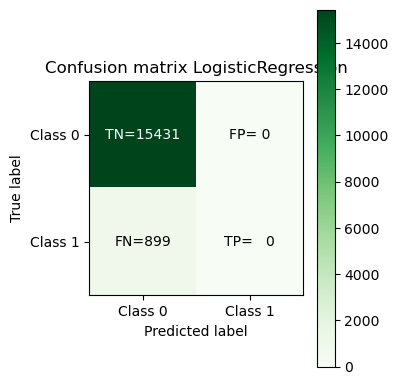

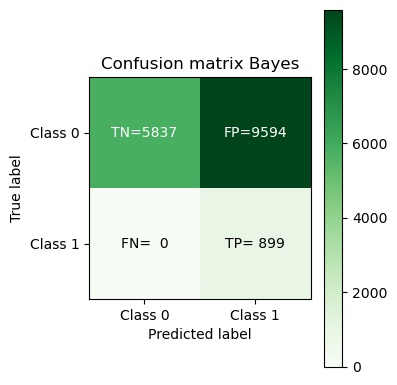

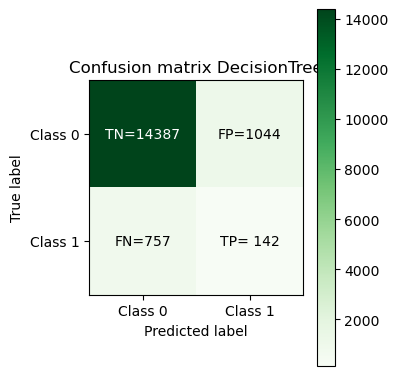

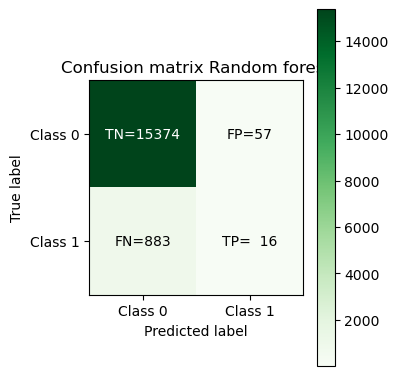

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


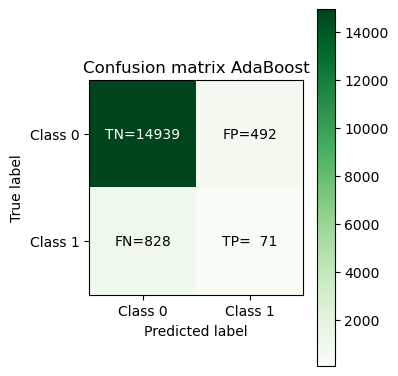

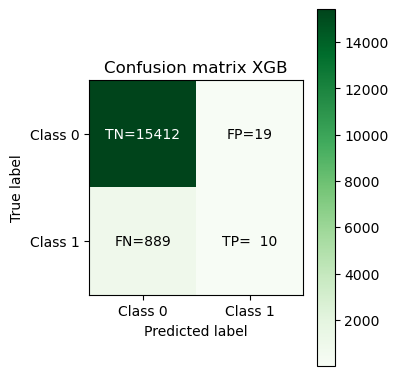

,Model,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1 Score Train,F1 Score Test
0,LogisticRegression,0.943810,0.944948,0.471905,0.472474,0.500000,0.500000,0.485546,0.485847
1,Bayes,0.413642,0.412492,0.543617,0.542838,0.688927,0.689132,0.355068,0.353365
2,DecisionTree,0.998399,0.889712,0.998927,0.534872,0.985974,0.545149,0.992354,0.538653
3,Random forest,0.998373,0.942437,0.998236,0.582432,0.986399,0.507052,0.992237,0.501629
4,AdaBoost,0.998399,0.919167,0.996247,0.536798,0.988610,0.523546,0.992395,0.527408
5,XGB,0.948403,0.944397,0.974082,0.645146,0.540869,0.504946,0.562258,0.496469


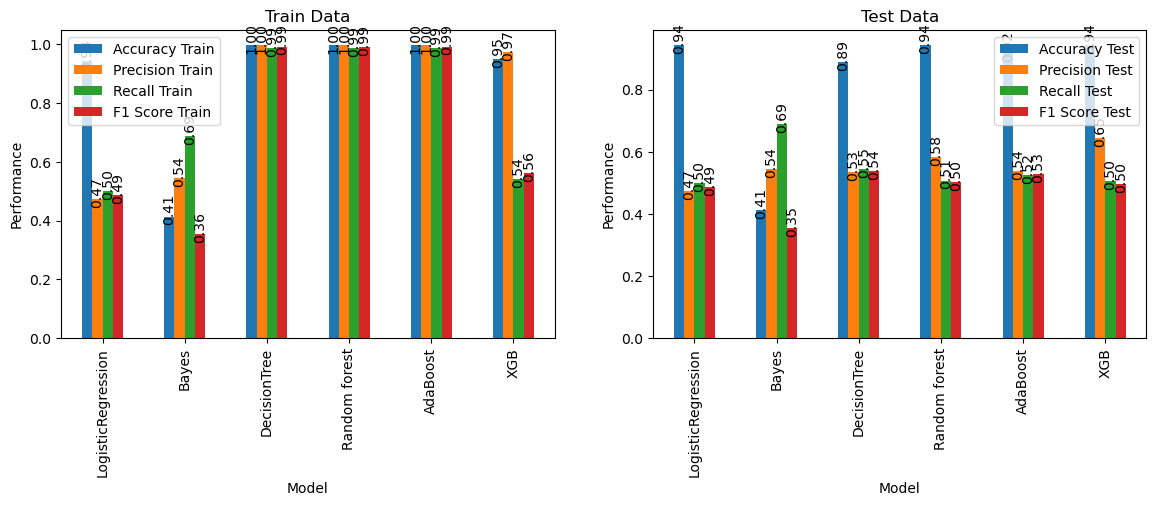

In [46]:
mod =[LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=100, random_state=0),
    XGBClassifier(n_estimators= 100)]

mod_names=['LogisticRegression','Bayes','DecisionTree','Random forest','AdaBoost','XGB']

report_model(X_train_all,X_test_all,y_train_all,y_test_all,mod,mod_names)

## 5. Feature importance 

### 5.1. PCA

#### Check the number of components in PCA

In [47]:
## Data Set:
X_df
X_df_scale = data_scale(X_df)
y = Y.to_numpy()

Cumulative Variances (%):[ 21.40023997  31.44212658  39.93141678  47.73257064  54.00512699
  59.55142242  64.65947908  69.56261241  74.22247292  78.62269702
  82.8221704   86.3600313   89.34508001  92.24862266  94.61773021
  96.78999947  98.68061369 100.         100.         100.        ]
Number of components: 20
List of features important in each component
Component 1: ['Owner', 'Self-Employed', 'Employed', 'children']
Component 2: ['Activated', 'advance', 'Pyament_term', 'Terminated']
Component 3: ['F', 'M', 'Activated', 'Pyament_term']
Component 4: ['Rental house/room', 'taddress', 'Parent', 'Married']
Component 5: ['Yes', 'No', 'taddress', 'temployer']
Component 6: ['Divorced', 'Paid Off', 'Married', 'Repossessed']
Component 7: ['Paid Off', 'Terminated', 'Divorced', 'Repossessed']
Component 8: ['Repossessed', 'Employed', 'Self-Employed', 'Paid Off']
Component 9: ['Other', 'Repossessed', 'Terminated', 'Paid Off']
Component 10: ['Relative/Guest', 'Rental house/room', 'Divorced', 'Par

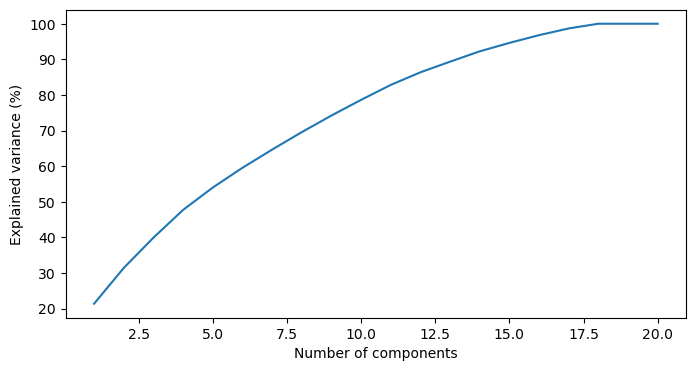

In [48]:
from sklearn.decomposition import PCA
def plot_variance_pca(data,n_components,scale=False):
    
    if scale==True:
        X = data_scale(data)
    else:
        X = data

    # pca
    pca = PCA(n_components)
    pca.fit(X)
    var_pca = np.cumsum(pca.explained_variance_ratio_*100)
    components = len(pca.explained_variance_ratio_)
    
    print(f"Cumulative Variances (%):{var_pca}")
    print(f'Number of components: {components}')
    
    ## plot data
    fig=plt.figure(figsize=(8,4))
    plt.plot(range(1, components + 1), var_pca)
    plt.xlabel("Number of components")
    plt.ylabel("Explained variance (%)")
    
    # features important in each component: 
    #pca.fit(data)
    pca_components = abs(pca.components_)
    print('List of features important in each component')
    for row in range(pca_components.shape[0]):
        # get the indices of the list 4 features  in each row
        temp = np.argpartition(-(pca_components[row]), 4)
        # sort the indices in descending order
        indices = temp[np.argsort((-pca_components[row])[temp])][:4]
        # print the list of 4 feature names
        print(f'Component {row+1}: {data.columns[indices].to_list()}')
    
    plt.show()
    
################################################    
plot_variance_pca(data= X_df,n_components=20,scale=True)

In [49]:
from mpl_toolkits.mplot3d import Axes3D
from plotly.graph_objects import Scatter3d
import plotly.graph_objects as go

def plot_pca_components(X, Y, n_components=2, plot_2d=False, plot_3d=False, i=1, j=2, k=3):
    # Perform PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    if plot_2d:
        # 2D scatter plot
        fig = go.Figure(data=[go.Scattergl(
                x = X_pca[:, i-1],
                y = X_pca[:, j-1],
                mode='markers',
                marker=dict(size=10,color=Y,colorscale=['red', 'blue'], opacity=1,
                        line=dict(color='black', width=0.2),
                        colorbar=dict(title="Classes")),
                text=Y,
                name='Classes')])
        fig.update_layout(title="PCA", xaxis_title=f"Component {i}", yaxis_title=f"Component {j}")
        fig.show()
        
    if plot_3d:
        # 3D scatter plot
        fig = go.Figure(data=[go.Scatter3d(
            x=X_pca[:, i-1],
            y=X_pca[:, j-1],
            z=X_pca[:, k-1],
            mode='markers',
            marker=dict(size=5,color=Y,colorscale=['red', 'blue'],opacity=1,
                line=dict(color='black', width=0.2),
                colorbar=dict(title="Classes")),
            text=Y,
            name='Classes')])
        fig.update_layout(title="PCA" ,scene=dict(
            xaxis_title=f"Component {i}",
            yaxis_title=f"Component {j}",
            zaxis_title=f"Component {k}",
            aspectratio=dict(x=1, y=1, z=1),
            camera=dict(up=dict(x=0, y=0, z=1), eye=dict(x=0, y=1, z=1))))
        fig.show()
        
#######################################################
#plot_pca_components(X_df,y, n_components=18,plot_3d=True,i=1,j=2,k=3) 

#### PCA transfome and Split data for model

In [50]:
from sklearn.decomposition import PCA
def pca_transform_scale(data, n_components):
    pca = PCA(n_components) 
    pca.fit(data)
    data_pca = pca.transform(data)
    return data_pca

In [52]:
X_df_PCA = pca_transform_scale(X_df_scale, n_components=10)
## Split data: 
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_df_PCA, Y,test_size=0.3, 
                                                                    random_state=0,shuffle=True) 
print(X_train_PCA.shape)
print(X_test_PCA.shape)

(38103, 10)
(16330, 10)


### Model with apply PCA on feactures

c:\users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


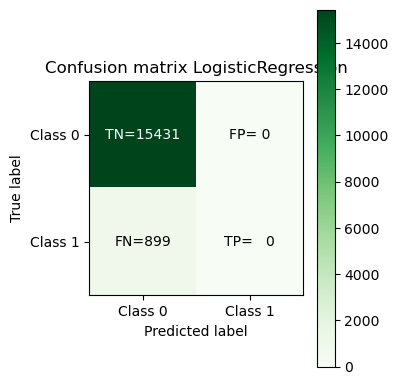

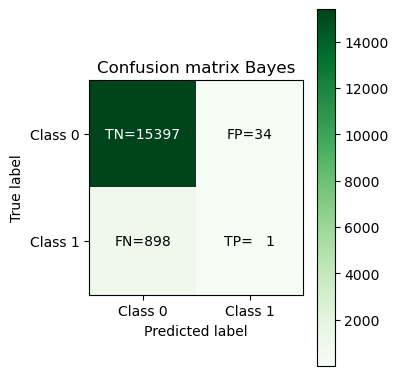

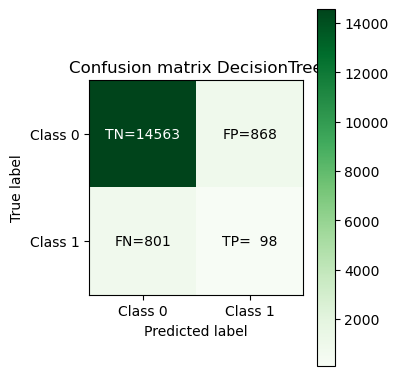

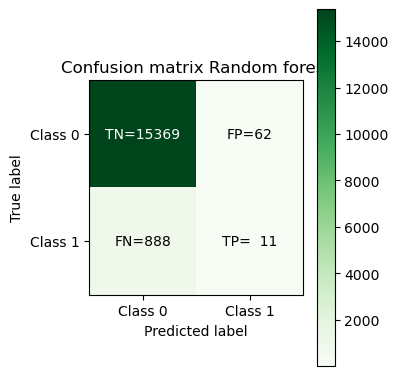

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


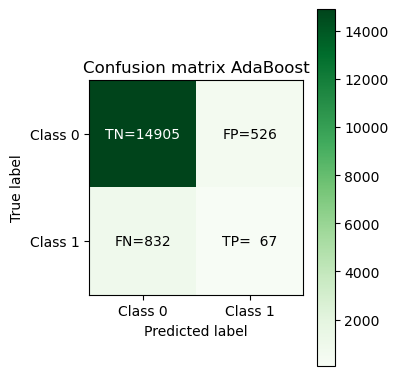

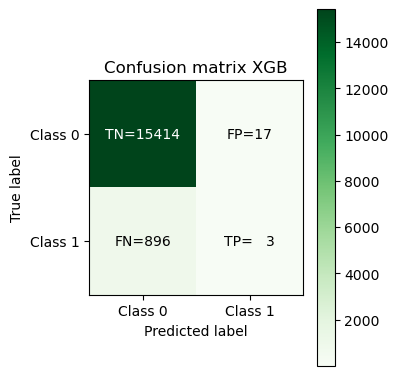

,Model,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1 Score Train,F1 Score Test
0,LogisticRegression,0.943810,0.944948,0.471905,0.472474,0.500000,0.500000,0.485546,0.485847
1,Bayes,0.942131,0.942927,0.526841,0.486731,0.501087,0.499454,0.489147,0.486382
2,DecisionTree,0.998399,0.897795,0.998927,0.524657,0.985974,0.526380,0.992354,0.525448
3,Random forest,0.998399,0.941825,0.997579,0.548031,0.987292,0.504109,0.992374,0.496327
4,AdaBoost,0.998399,0.916840,0.998927,0.530058,0.985974,0.520220,0.992354,0.523121
5,XGB,0.947196,0.944091,0.966013,0.547532,0.530565,0.501118,0.544001,0.488882


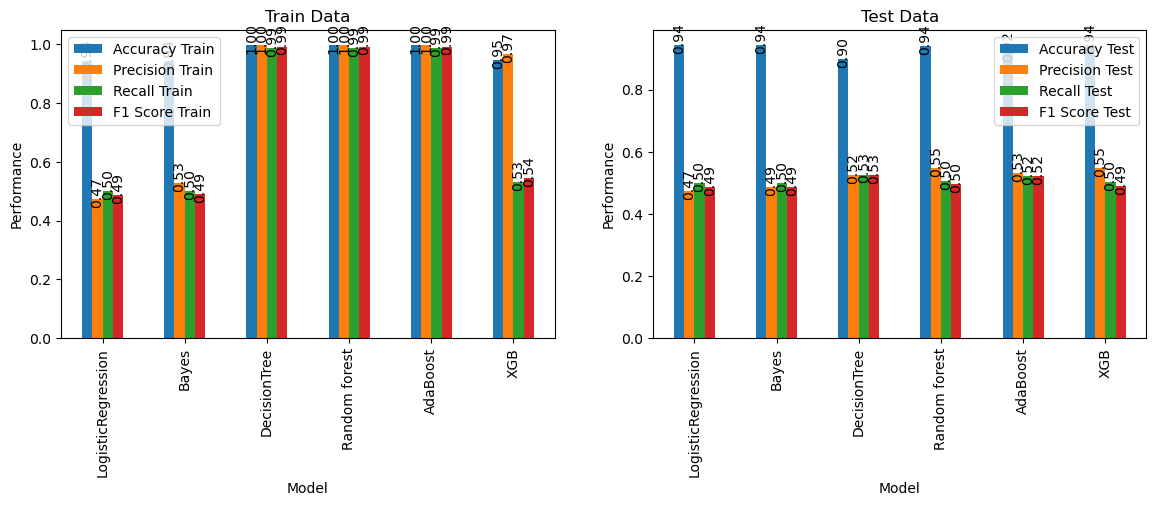

In [53]:
mod =[LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=100, random_state=0),
    XGBClassifier(n_estimators= 100)]

mod_names=['LogisticRegression','Bayes','DecisionTree','Random forest','AdaBoost','XGB']

report_model(X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA,mod,mod_names)

In [77]:
'''
for clf, nanmes in zip(mod, mod_names):
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(1,2,1)
    plot_boundary(X_df,X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA,model=clf,plot_test=True,pca=True,i=1,j=2) 
    ax.set_title(nanmes, fontsize=14)
    plt.show()
'''

'\nfor clf, nanmes in zip(mod, mod_names):\n    fig = plt.figure(figsize=(10,4))\n    ax = fig.add_subplot(1,2,1)\n    plot_boundary(X_df,X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA,model=clf,plot_test=True,pca=True,i=1,j=2) \n    ax.set_title(nanmes, fontsize=14)\n    plt.show()\n'

### 5.2  ExtraTreesClassifier

In [54]:
from sklearn.ensemble import ExtraTreesClassifier 

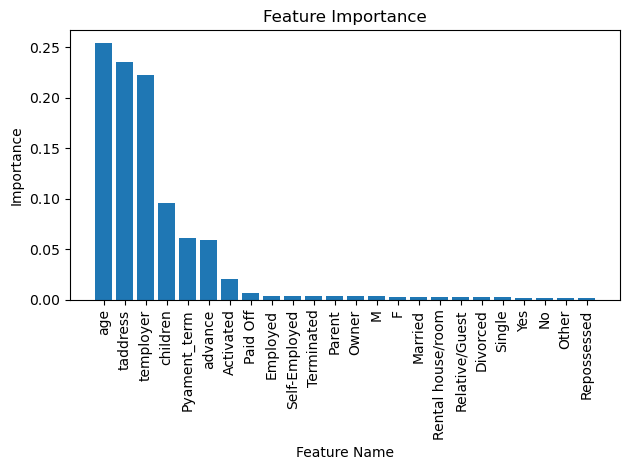

In [55]:
from sklearn.ensemble import ExtraTreesClassifier 
def plot_feature_importance(X,y,title="Feature Importance",model=None):
    # model 
    mod = model.fit(X, y)
    # Get feature importances and feature names
    importances = mod.feature_importances_
    feature_names = X.columns
    # Sort feature importances and names in descending order
    sorted_indices = importances.argsort()[::-1]
    sorted_importances = importances[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]
    # Plot the feature importances
    plt.title(title)
    plt.bar(range(X.shape[1]), sorted_importances, align="center")
    plt.xticks(range(X.shape[1]), sorted_feature_names, rotation='vertical')
    plt.xlabel("Feature Name")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()
################################################################################
plot_feature_importance(X_df,y, model= ExtraTreesClassifier()) 

## 6.Imbalanced dataset apply with all Feactures of Data set

In [56]:
#Imbalanced dataset: SMOTE,Under sampling and over sampling 

### 6.1. OverSampling

In [57]:
from imblearn.over_sampling import SMOTE,BorderlineSMOTE,SVMSMOTE,ADASYN
def OverSampling_transform(X_train, y_train , method):
    from collections import Counter
    counter_y = Counter(y_train)
    #print(f'Counts of label, before OverSampling: {counter_y}')
    if method == 'SMOTE':
        oversample = SMOTE()
    if method == 'BorderlineSMOTE':
        oversample = BorderlineSMOTE()
    if  method == 'SVMSMOTE':
        oversample = SVMSMOTE()
    if method == 'ADASYN':
        oversample = ADASYN()
        
    X , y = oversample.fit_resample(X_train, y_train.ravel())
    counter = Counter(y)
    #print(f'Counts of label, after OverSampling: {counter}')
        
    return X, y

#### data for model:

In [58]:
## Split data :
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_df_scale, y, 
                                                test_size=0.3, random_state=1)

In [59]:
X_sm,y_sm = OverSampling_transform(X_train_all, y_train_all , method="SMOTE")

#### Applay oversampling "SMOTE"

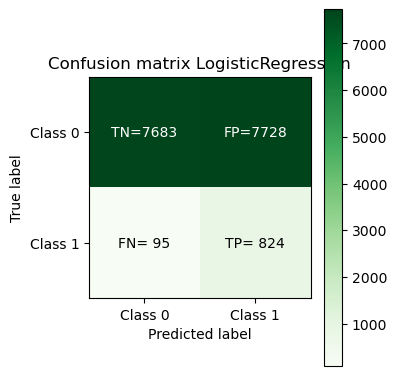

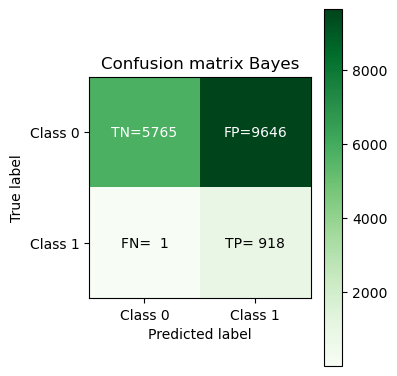

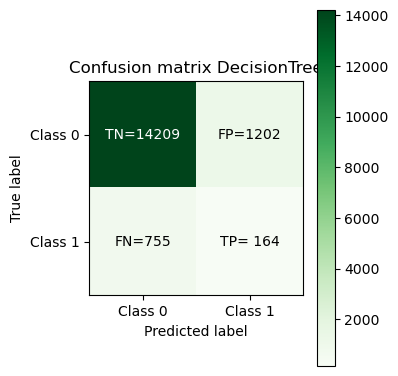

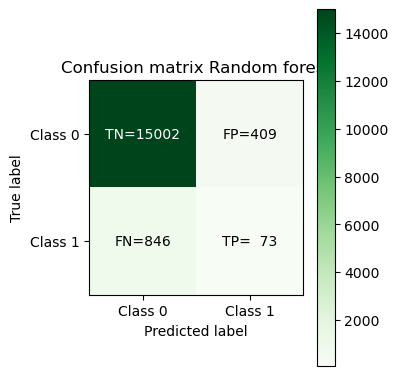

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



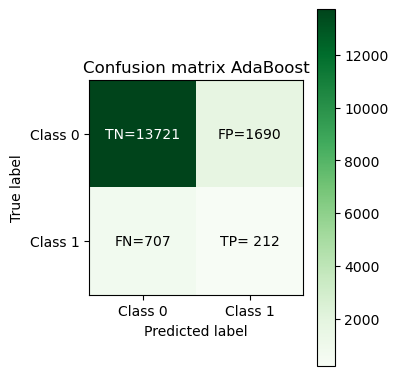

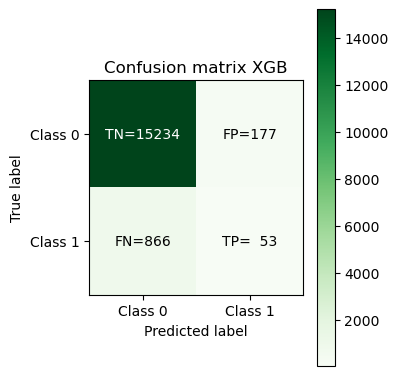

,Model,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1 Score Train,F1 Score Test
0,LogisticRegression,0.711453,0.520943,0.757390,0.542069,0.711453,0.697583,0.697977,0.418323
1,Bayes,0.690109,0.409247,0.808235,0.543363,0.690109,0.686498,0.657273,0.352174
2,DecisionTree,0.998986,0.880159,0.998987,0.534802,0.998986,0.550229,0.998986,0.539558
3,Random forest,0.998986,0.923148,0.998986,0.549035,0.998986,0.526447,0.998986,0.532031
4,AdaBoost,0.998986,0.853215,0.998987,0.531230,0.998986,0.560512,0.998986,0.534985
5,XGB,0.968192,0.936130,0.969363,0.588323,0.968192,0.523093,0.968173,0.529577


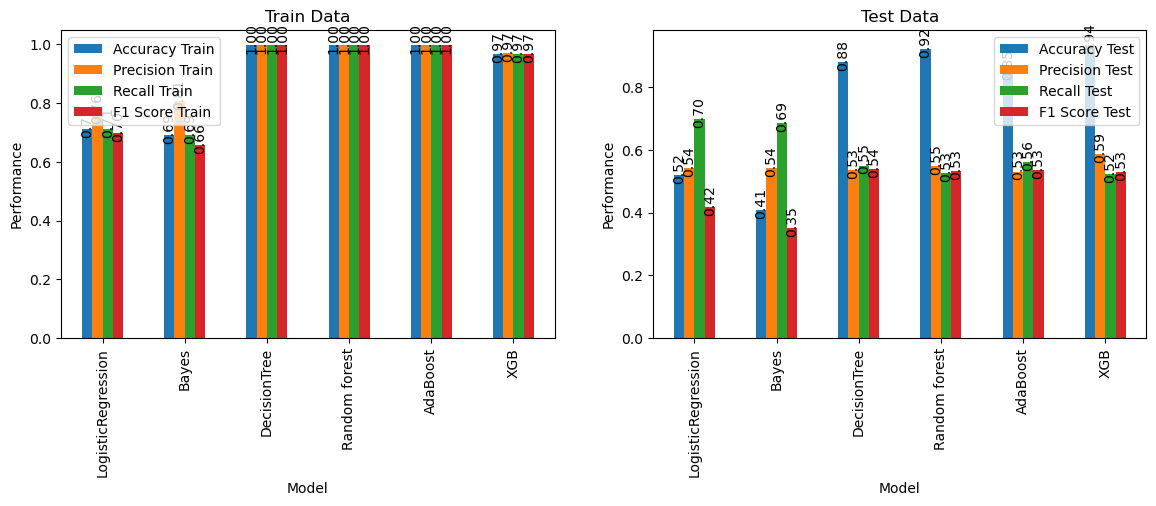

In [98]:
mod =[LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=100, random_state=0),
    XGBClassifier(n_estimators= 100)]

mod_names=['LogisticRegression','Bayes','DecisionTree','Random forest','AdaBoost','XGB']

report_model(X_sm, X_test_all, y_sm,y_test_all,mod,mod_names) 

In [78]:
'''
for clf, nanmes in zip(mod, mod_names):
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(1,2,1)
    plot_boundary(X_df,X_sm, X_test_all, y_sm,y_test_all, model=clf,plot_test=True,i=3,j=4) 
    ax.set_title( nanmes, fontsize=14)
    plt.show()
'''

'\nfor clf, nanmes in zip(mod, mod_names):\n    fig = plt.figure(figsize=(10,4))\n    ax = fig.add_subplot(1,2,1)\n    plot_boundary(X_df,X_sm, X_test_all, y_sm,y_test_all, model=clf,plot_test=True,i=3,j=4) \n    ax.set_title( nanmes, fontsize=14)\n    plt.show()\n'

#### Applay oversampling "SMOTE" +PCA

In [60]:
X_df_PCA = pca_transform_scale(X_df_scale, n_components=10)
## Split data: 
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_df_PCA, Y,
                                    test_size=0.3, random_state=0,shuffle=True)

In [61]:
X_sm_PCA,y_sm_PCA = OverSampling_transform(X_train_PCA, y_train_PCA , method="SMOTE")

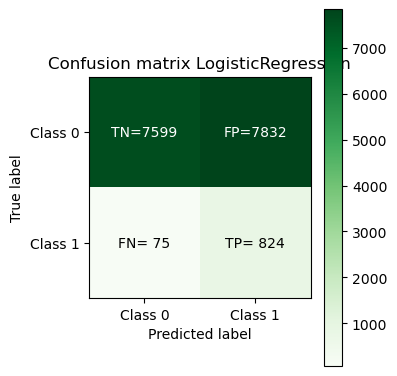

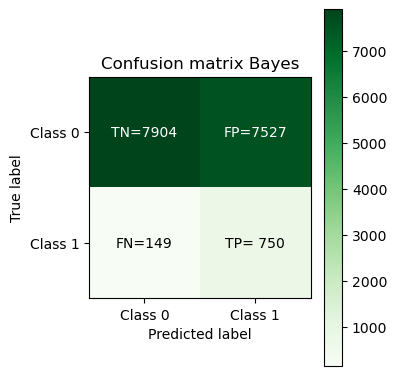

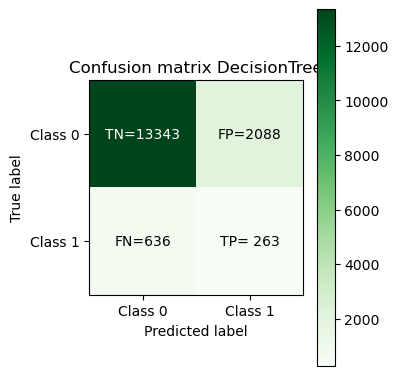

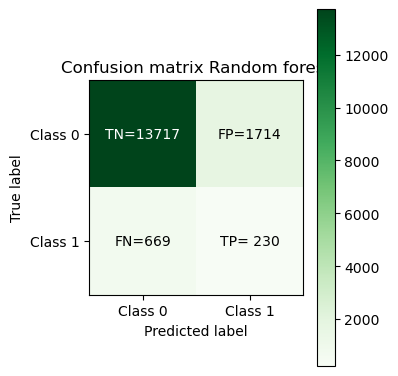

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


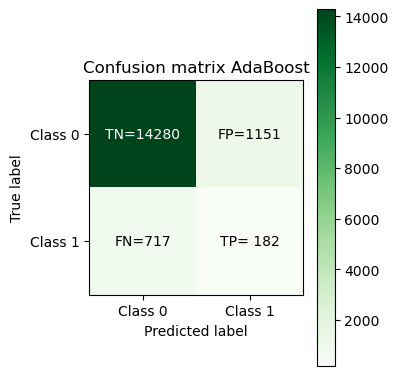

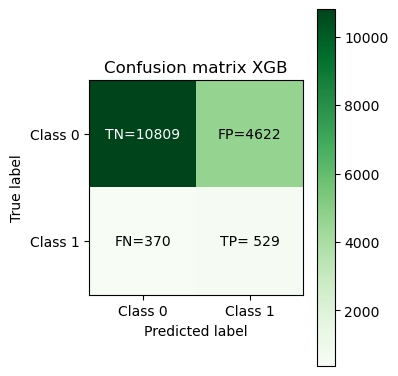

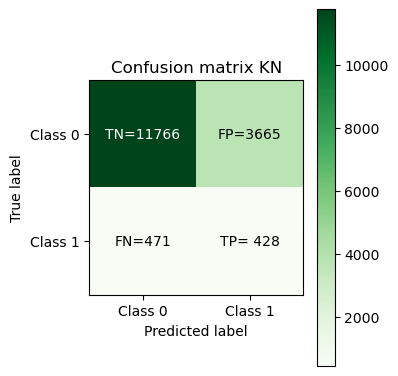

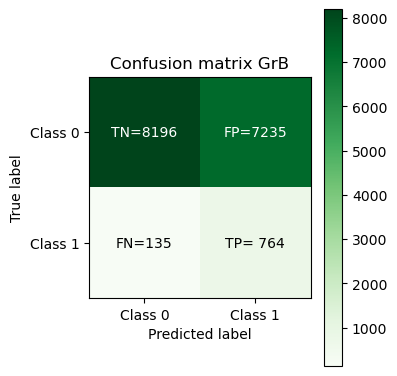

,Model,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1 Score Train,F1 Score Test
0,LogisticRegression,0.705648,0.515799,0.752100,0.542710,0.705648,0.704512,0.691433,0.415127
1,Bayes,0.677701,0.529945,0.700366,0.536055,0.677701,0.673238,0.668322,0.418305
2,DecisionTree,0.999152,0.833190,0.999153,0.533185,0.999152,0.578618,0.999152,0.534612
3,Random forest,0.999152,0.854072,0.999152,0.535905,0.999152,0.572382,0.999152,0.540940
4,AdaBoost,0.999152,0.885609,0.999152,0.544362,0.999152,0.563929,0.999152,0.550846
5,XGB,0.846699,0.694305,0.864485,0.534800,0.846699,0.644452,0.844806,0.493639
6,KN,0.885129,0.746724,0.897758,0.533039,0.885129,0.619288,0.884210,0.510994
7,GrB,0.735040,0.548683,0.779486,0.539654,0.735040,0.690486,0.724070,0.430782


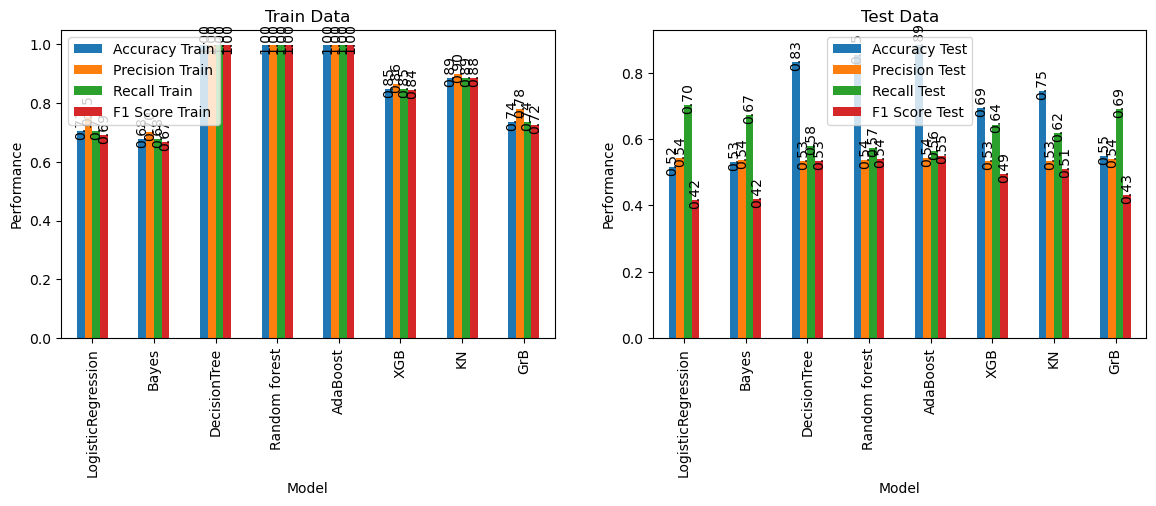

In [63]:
mod =[LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=100, random_state=0),
    XGBClassifier(n_estimators= 100)]

mod_names=['LogisticRegression','Bayes','DecisionTree','Random forest','AdaBoost','XGB']

report_model(X_sm_PCA, X_test_PCA, y_sm_PCA,y_test_PCA,mod,mod_names)  

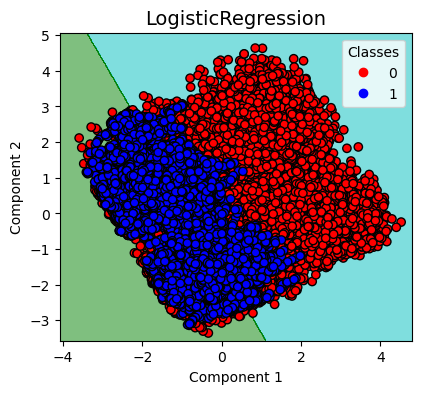

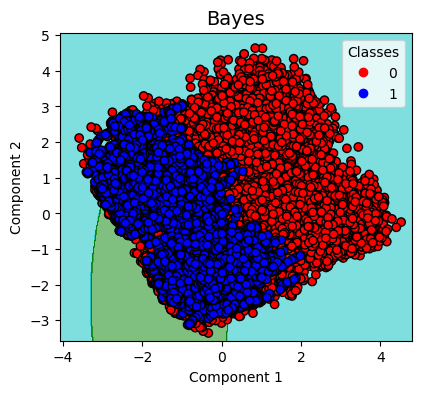

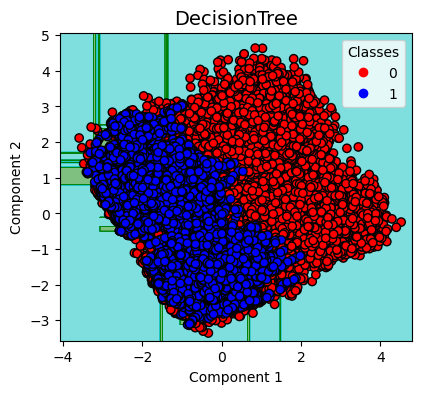

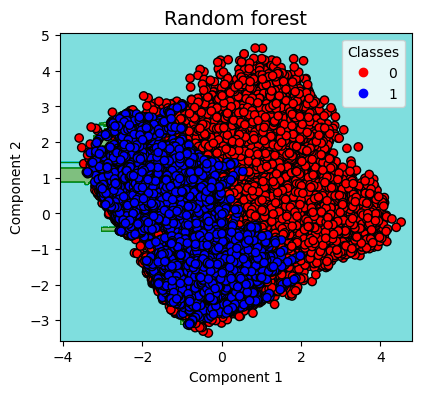

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



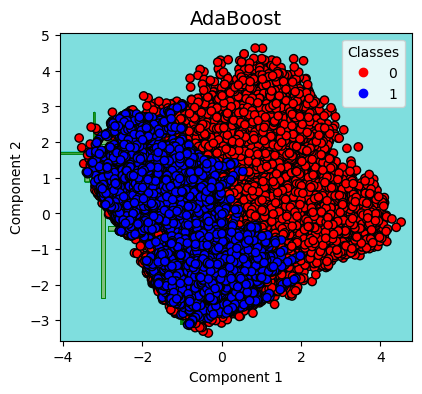

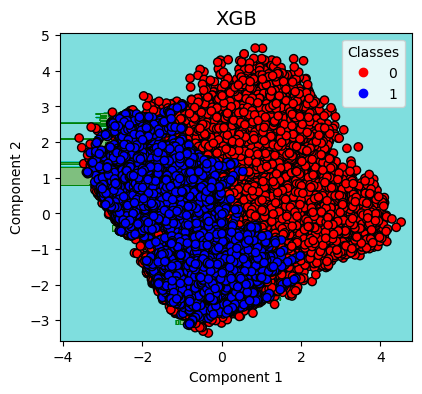

In [128]:

for clf, nanmes in zip(mod, mod_names):
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(1,2,1)
    plot_boundary(X_df,X_sm_PCA, X_test_PCA, y_sm_PCA,y_test_PCA, model=clf,
                  plot_train=True,pca=True,i=1,j=2) 
    ax.set_title( nanmes, fontsize=14)
    plt.show()


### 6.2. UnderSampling

In [64]:
from imblearn.under_sampling import NearMiss,TomekLinks
def UnderSampling_transform(X_train, y_train , method):
    from collections import Counter
    counter_y = Counter(y_train)
    #print(f'Counts of label, before UnderSampling: {counter_y}')
    if method == 'Near Miss':
        undersample = NearMiss(n_neighbors = 20)

    if method == 'Tomek Links':
        undersample = TomekLinks()

    X,y = undersample.fit_resample(X_train, y_train.ravel())   
    counter = Counter(y)
    #print(f'Counts of label, after UnderSampling: {counter}')
    
    return X, y

In [65]:
## Split data :
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_df_scale, y, test_size=0.3, random_state=1)

In [66]:
X_res,y_res = UnderSampling_transform(X_train_all, y_train_all,method='Near Miss')

#### Modeling with Undersampling

c:\users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



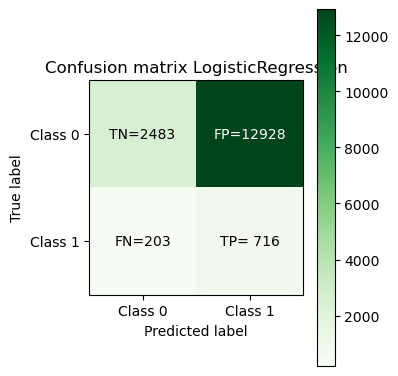

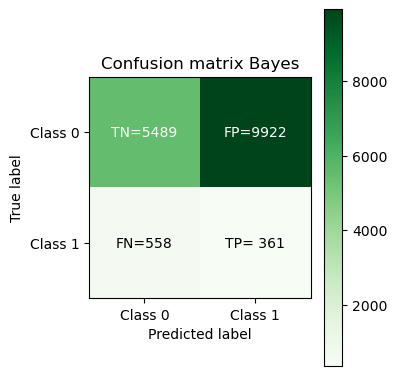

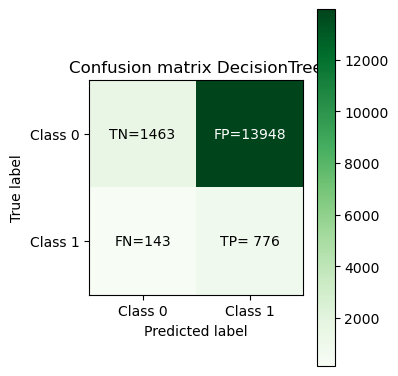

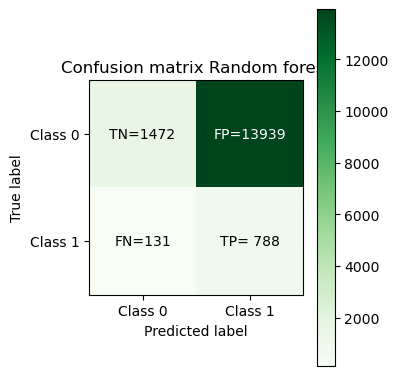

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



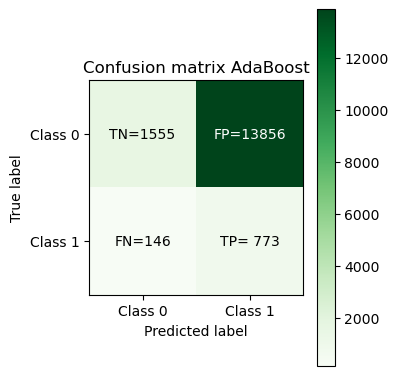

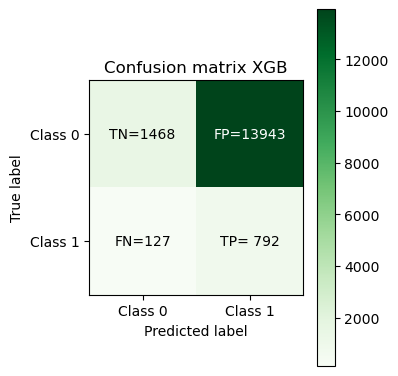

,Model,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1 Score Train,F1 Score Test
0,LogisticRegression,0.823432,0.195897,0.826363,0.488450,0.823432,0.470113,0.823035,0.186371
1,Bayes,0.693777,0.358236,0.806702,0.471415,0.693777,0.374496,0.662732,0.288028
2,DecisionTree,0.990335,0.137110,0.990468,0.481831,0.990335,0.469664,0.990334,0.135580
3,Random forest,0.990335,0.138396,0.990414,0.485893,0.990335,0.476485,0.990334,0.136881
4,AdaBoost,0.990335,0.142560,0.990440,0.483504,0.990335,0.471017,0.990334,0.140589
5,XGB,0.955681,0.138396,0.958558,0.487063,0.955681,0.478531,0.955612,0.136917


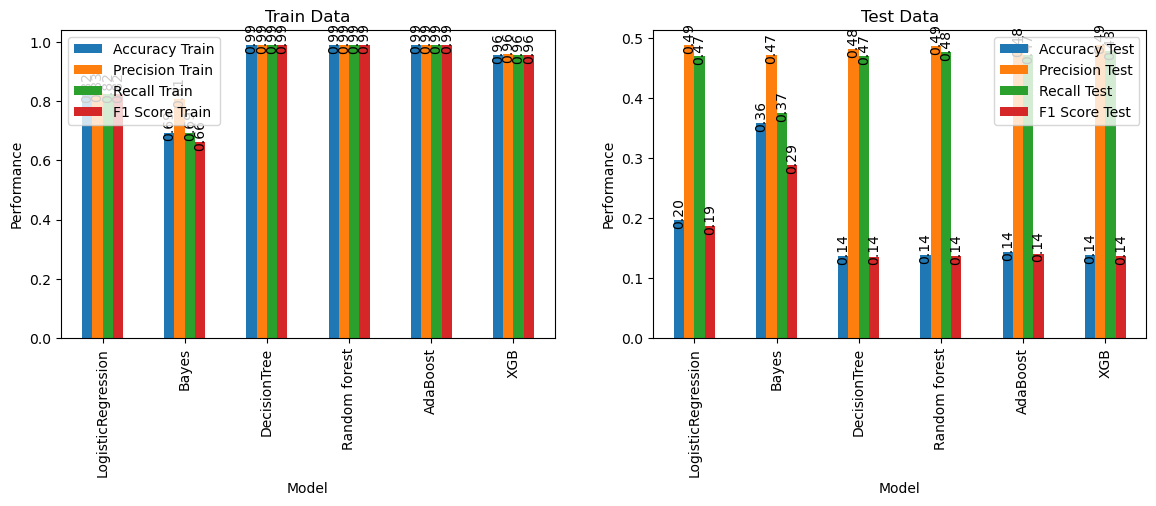

In [122]:
mod =[LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=100, random_state=0),
    XGBClassifier(n_estimators= 100)]

mod_names=['LogisticRegression','Bayes','DecisionTree','Random forest','AdaBoost','XGB']
report_model(X_res,X_test_all,y_res,y_test_all,mod,mod_names)

In [79]:
'''
for clf, names in zip(mod, mod_names):
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(1,2,1)
    plot_boundary(X_df,X_res,X_test_all,y_res,y_test_all, model=clf,plot_train=True,i=3,j=4) 
    ax.set_title(names, fontsize=14)
    plt.show()
'''

'\nfor clf, names in zip(mod, mod_names):\n    fig = plt.figure(figsize=(10,4))\n    ax = fig.add_subplot(1,2,1)\n    plot_boundary(X_df,X_res,X_test_all,y_res,y_test_all, model=clf,plot_train=True,i=3,j=4) \n    ax.set_title(names, fontsize=14)\n    plt.show()\n'

#### Applay Undersampling "NearMiss" + PCA

In [67]:
X_df_PCA = pca_transform_scale(X_df_scale, n_components=18)
## Split data: 
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_df_PCA, Y,test_size=0.3, 
                                                    random_state=0,shuffle=True)

In [68]:
X_res_PCA,y_res_PCA = UnderSampling_transform(X_train_PCA, y_train_PCA , method='Near Miss')

c:\users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


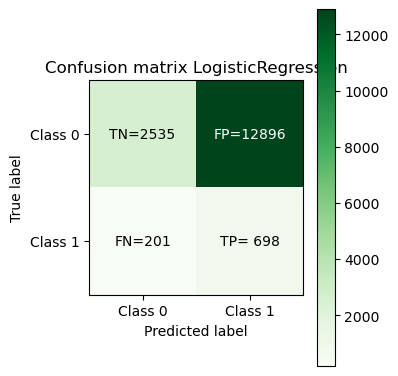

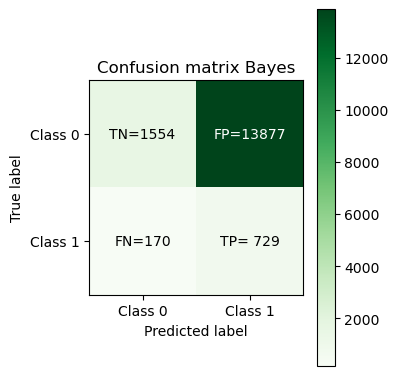

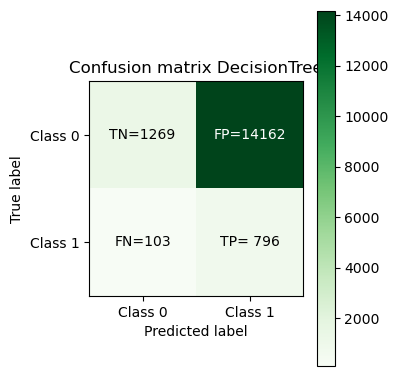

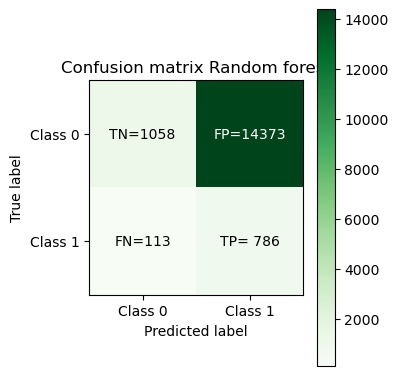

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


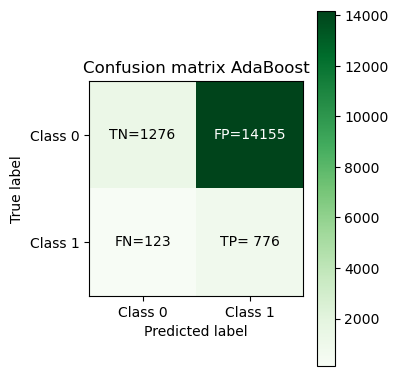

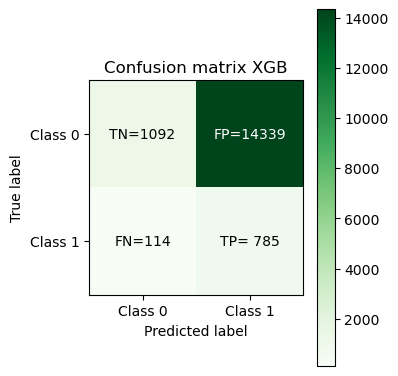

,Model,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1 Score Train,F1 Score Test
0,LogisticRegression,0.813171,0.197979,0.816332,0.488941,0.813171,0.470349,0.812704,0.187700
1,Bayes,0.861747,0.139804,0.864867,0.475652,0.861747,0.455804,0.861451,0.137603
2,DecisionTree,0.991359,0.126454,0.991491,0.489071,0.991359,0.483833,0.991359,0.125721
3,Random forest,0.991359,0.112921,0.991437,0.477676,0.991359,0.471434,0.991359,0.112675
4,AdaBoost,0.991359,0.125658,0.991491,0.482026,0.991359,0.472936,0.991359,0.124838
5,XGB,0.981784,0.114942,0.982392,0.478688,0.981784,0.471980,0.981778,0.114629


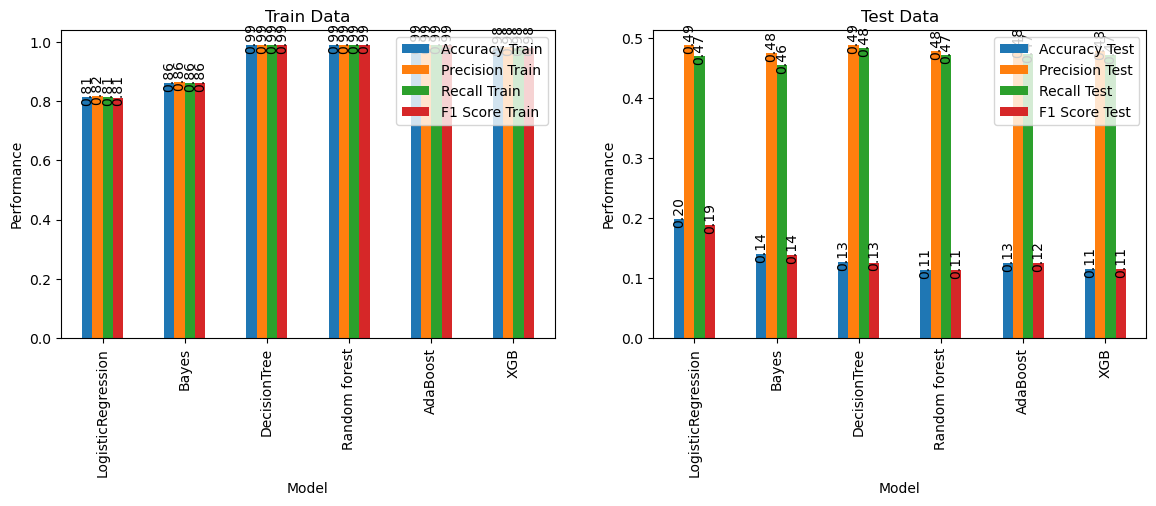

In [70]:
mod =[LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=100, random_state=0),
    XGBClassifier(n_estimators= 100)]

mod_names=['LogisticRegression','Bayes','DecisionTree','Random forest','AdaBoost','XGB']
report_model(X_res_PCA,X_test_PCA,y_res_PCA,y_test_PCA,mod,mod_names)

In [80]:
'''
for clf, names in zip(mod, mod_names):
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(1,2,1)
    plot_boundary(X_df,X_res_PCA,X_test_PCA,y_res_PCA,y_test_PCA, model=clf,plot_test=True,pca=True,i=1,j=2) 
    ax.set_title(names, fontsize=14)
    plt.show()
'''

'\nfor clf, names in zip(mod, mod_names):\n    fig = plt.figure(figsize=(10,4))\n    ax = fig.add_subplot(1,2,1)\n    plot_boundary(X_df,X_res_PCA,X_test_PCA,y_res_PCA,y_test_PCA, model=clf,plot_test=True,pca=True,i=1,j=2) \n    ax.set_title(names, fontsize=14)\n    plt.show()\n'

## 7. Developping model and Model selection by apply Over Sampling "SMOTE" + PCA

###  Data : Sampling "SMOTE" + PCA

In [57]:
X_df_scale = data_scale(X_df)
y = Y.to_numpy()
## Split data: 
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_df_scale,y, test_size=0.3,random_state=0,shuffle=True)
## pca
X_df_PCA = pca_transform_scale(X_df_scale, n_components=18)
## Split data: 
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_df_PCA, Y,test_size=0.3, random_state=0,shuffle=True) 

###  Test : Parameter in Model

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

### 7.0. Logistic Regression 

In [59]:
# scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
# Define the parameter grid:
param_grid = {
    'C': [0.05 , 0.1 , 0.5 , 1, 1.5 , 2, 5, 10, 50, 100],
    'penalty': ['l1', 'l2']}
# Perform grid search for parameter tuning:
cv = KFold(n_splits=5, shuffle=True)
grid_search_LR = GridSearchCV(LogisticRegression(), param_grid, cv=cv,scoring= 'f1_macro')
# Fit the grid search to the training data
grid_search_LR.fit(X_sm_PCA,y_sm_PCA)
# Get the best parameters and model
best_params_LR = grid_search_LR.best_params_
best_model_LR = grid_search_LR.best_estimator_
print(best_params_LR)
print(best_model_LR)

{'C': 0.05, 'penalty': 'l2'}
LogisticRegression(C=0.05)


c:\users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueErr

### 7.1. Decision Tree

In [76]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10,50,100,150,200,250,300,350,400,450,500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion' :['entropy'],
    'splitter': ['best']
}
# Perform grid search for parameter tuning:
cv = KFold(n_splits=5, shuffle=True)
grid_search_DT = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=cv,scoring= 'f1_macro')
# Fit the grid search to the training data
grid_search_DT.fit(X_sm_PCA,y_sm_PCA)
# Get the best parameters and model
best_params_DT = grid_search_DT.best_params_
best_model_DT = grid_search_DT.best_estimator_
print(best_params_DT)
print(best_model_DT) 

{'criterion': 'entropy', 'max_depth': 150, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=150)


### 7.2 Random Forest

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10,50,100,150,200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion' :['entropy']
}
# Perform grid search for parameter tuning:
cv = KFold(n_splits=5, shuffle=True)
grid_search_RF = GridSearchCV(RandomForestClassifier(), param_grid, cv=cv,scoring= 'f1_macro')
# Fit the grid search to the training data
grid_search_RF.fit(X_sm_PCA,y_sm_PCA)
# Get the best parameters and model
best_params_RF = grid_search_RF.best_params_
best_model_RF = grid_search_RF.best_estimator_
print(best_params_RF)
print(best_model_RF)

### 7.4.AdaBoost

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.05, 0.01],
    'base_estimator': [DecisionTreeClassifier()],
    'base_estimator__max_depth': [None,3, 5,10,50,100,150]
}
# Perform grid search for parameter tuning:
cv = KFold(n_splits=5, shuffle=True)
grid_search_AD = GridSearchCV(AdaBoostClassifier(), param_grid, cv=cv,scoring= 'f1_macro')
# Fit the grid search to the training data
grid_search_AD.fit(X_sm_PCA,y_sm_PCA)
# Get the best parameters and model
best_params_AD = grid_search_AD.best_params_
best_model_AD = grid_search_AD.best_estimator_
print(best_params_AD)
print(best_model_AD)

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renam

### 7.5.XGBoost

In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [None,3, 5,10,50,100,150],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'reg_alpha': [0.1, 0.01, 0.001],
    'reg_lambda': [0.1, 0.01, 0.001]
}
# Perform grid search for parameter tuning:
cv = KFold(n_splits=5, shuffle=True)
grid_search_XG = GridSearchCV(XGBClassifier(), param_grid, cv=cv,scoring= 'f1_macro')
# Fit the grid search to the training data
grid_search_XG.fit(X_sm_PCA,y_sm_PCA)
# Get the best parameters and model
best_params_XG = grid_search_XG.best_params_
best_model_XG = grid_search_XG.best_estimator_
print(best_params_XG)
print(best_model_XG)

## Cross Validation

In [ ]:

mod =[LogisticRegression(C= 0.7,penalty="l2", solver='lbfgs'),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=400,min_samples_split=0.5),
    RandomForestClassifier(n_estimators=100,max_depth=200,min_samples_split=0.5),
    AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=150,
                        min_samples_split=0.1), n_estimators=100, random_state=0),
    XGBClassifier(n_estimators= 100,max_depth=150,learning_rate = 0.27, gamma = 0.11,
                  reg_lambda=0.29)]

In [148]:

mod =[LogisticRegression(C= 0.7,penalty="l2", solver='lbfgs'),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=400,min_samples_split=0.5),
    RandomForestClassifier(n_estimators=100,max_depth=200,min_samples_split=0.5),
    AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=150,
                            min_samples_split=0.1), n_estimators=100, random_state=0),
    XGBClassifier(n_estimators= 100,max_depth=150,learning_rate = 0.27, gamma = 0.11,
                  reg_lambda=0.29)]

mod_names=['LogisticRegression','Bayes','DecisionTree','Random forest','AdaBoost','XGB']
score = ['Accuracy Test','Accuracy Train','Precision Test','Precision Train',
              'Recall Test','Recall Train','F1 Score Test','F1 Score Train']

X_df_scale = data_scale(X_df)
y = Y.to_numpy()
X_df_PCA = pca_transform_scale(X_df_scale, n_components=18)
# Apply crovalidation
k=5
df_cv = []
for i  in range(len(mod)):
    cv = cross_validation(X_df_PCA,y,k, model =mod[i],resample='Over',method='SMOTE',
                          plot=False)[0]
    df_cv.append(cv)
## Compare with another model: 
for sc in score:
    fig = go.Figure()   
    fig.add_trace(go.Box(y=df_cv[0][sc],  name = mod_names[0]))
    fig.add_trace(go.Box(y=df_cv[1][sc],  name = mod_names[1]))
    fig.add_trace(go.Box(y=df_cv[2][sc],  name = mod_names[2]))
    fig.add_trace(go.Box(y=df_cv[3][sc],  name = mod_names[3]))
    fig.add_trace(go.Box(y=df_cv[4][sc],  name = mod_names[4]))
    fig.add_trace(go.Box(y=df_cv[5][sc],  name = mod_names[5]))
    fig.update_traces(boxpoints='all', jitter=0.3,boxmean=True)
    #fig.add_trace(go.Box(y=df_cv[3],  name = mod_names[3],boxpoints='all'))
    fig.update_layout(title=f"Cross Validation with {k} fold of "+str(sc))
    fig.show()


c:\users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\users\asus\anaconda3\lib\site-packages\sk